<h1> 🌌🚀The scenario of the missing crew members🚀🌌 <h1>

por: <b>David Isaac - 120064 & João Vitor - 120046<b><br>
<div style="text-align: justify;">
Iscte - Sintra<br>
Projeto Final<br>
Aprendizagem automática supervisionada<br>
TDIA<br>
2023-2024

<h2>Capítulo 1<h2>
    <h3> Introdução </h3><br>
    <div style="text-align: justify;">
    O dataset que o grupo pretende utilizar foi retirado de uma competição do Kaggle e não possui dados reais. Seu tema é lúdico e mistura ficção científica com acontecimentos do passado. Neste cenário futurista, uma espaçonave colidiu com uma anomalia espacial e uma parcela de seus tripulantes foi transportada para uma outra dimensão. Com os dados comprometidos, não se sabe o paradeiro de alguns destes tripulantes. O alvo do nosso trabalho será justamente o paradeiro dos tripulantes (coluna Transported). O objetivo do trabalho será tentar entender quais características dos tripulantes, como a localização da sua cabine, se eram 1ª ou 2ª classe ou se estavam adormecidos durante o impacto, influenciaram no seu destino. Para isso temos 2 datasets, o primeiro contendo os tripulantes cujo target (transported) é conhecido, a fim de explorar os dados e treinar o algoritmo, sendo ele relevante o mais relevante ao trabalho.

Adicionalmente, o segundo dataset será usado para verificar nossos resultados e comparar com outros participantes da competição. O desempenho do nosso modelo em prever o target nessas entradas nos dirá quantas vidas ajudamos a salvar, dentro da narrativa proposta.
</div><br> 
    <h3>Definição do Estudo </h3><br>
    <div style="text-align: justify;">
    Estamos no ano de 2912, nossa tecnologia avançou a passos largos. A colonização espacial já é uma realidade, sendo a Terra apenas mais um de vários lugares habitáveis no nosso sistema solar. Porém, em uma sede de ambição, a humanidade lança a sua maior empreitada às pressas: o Spaceship Titanic, uma tentativa de ganhar espaço nas terras longínquas de Alfa-Centauri.

Meses se passam e, já perto de seu destino, a espaçonave sofre uma terrível colisão e vários de seus tripulantes foram perdidos espaço afora. Ao procurar por sobreviventes, percebeu-se que uma parte deles foram transportados para uma outra dimensão. Ainda com mais de 4000 desaparecidos, a companhia espacial quer tentar prever quais destes desaparecidos foram transportados para esta outra dimensão e quais ainda estão na orbita de Alfa-Centauri. Para isso, temos acesso às informações de bordo dos 8000 tripulantes cujos dados relativos ao paradeiro não foram comprometidos pela colisão.

Será que, assim como seu homônimo de 1000 anos atrás, os mais abastados, que conseguiram pagar pelo luxo de uma passagem VIP, tiveram um melhor destino? Ou será que o lugar onde a sua cabine estava localizada é a razão do transporte?  Alternativamente, há a hipótese de aqueles que não conseguiram lugar nas naves de fuga terem sido sugados para esta outra dimensão, o que colabora para as duas possibilidades anteriores e outras como o cryosleep ter sido no fim das contas uma má ideia. O serviço espacial quer respostas de imediato para poder traçar o plano de ação mais eficiente e, por isso, esperam nossos resultados para já. Cambio desligo.
</div><br>

<h3>Apresentação dos atributos do DataSet</h3><br>

<div style="text-align: justify;">
Neste tópico representamos os atributos do DataSet inicial, a sua descrição e o seu tipo de dado.</div>

**Nome da Coluna** | **Descrição** | **Tipo**
--- | --- | ---
PassengerId | A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates their number and pp the group the passenger is travelling with. People in a group are often family members, but not always. | Texto Simples
HomePlanet | The planet the passenger departed from, typically their planet of permanent residence. | Texto Simples
CryoSleep | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. | Booleano
Cabin | The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. | Texto Simples
Destination | The planet the passenger will be debarking to. | Texto Simples
Age | The age of the passenger. | Número
VIP | Whether the passenger has paid for special VIP service during the voyage. | Booleano
RoomService | Amount the passenger has billed at the Room Service | Número
FoodCourt | Amount the passenger has billed at the Food Court | Número
ShoppingMall | Amount the passenger has billed at the Shopping Mall | Número
Spa | Amount the passenger has billed at the Spa | Número
VRDeck | Amount the passenger has billed at the VR Deck | Número
Name | The first and last names of the passenger. | Texto Simples
Transported | Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict. | Booleano


<h2>Capítulo 2</h2><br>
<h3>Data Wrangling</h3><br>

<h3> Indice </h3> 
<h3> </h3>

<li><a href="leitura-do-ficheiro-de-treino">Leitura do ficheiro de treino
    <li><a href="#tipos-de-cada-atributo">Tipos de cada atributo</a></li>
    <li><a href="#modificacao-do-nome-das-colunas">Modificação do nome das colunas</a></li>
    <li><a href="#criacao-de-novas-tabelas">Criação de novas tabelas</a></li>
    <li><a href="#linhas-do-dataset-inicial-com-nulos">Linhas do DataSet inicial com Nulos</a></li>
    <li><a href="#substituicao-de-celulas-por-valores-logicos">Substituição de células por valores lógicos</a></li>
    <li><a href="#informacao-dos-valores-em-cada-atributo">Informação dos valores em cada atributo</a></li>
    <li><a href="#drop-no-resto-dos-nans">Drop no resto dos NaNs</a></li>
    <li><a href="#substituicao-dos-valores-das-colunas-em-booleano-para-string">Substituição dos valores das colunas em booleano para String</a></li>
    <li><a href="#divisao-em-datasets-com-true-ou-false-em-cada-coluna-vip-ou-sleep">Divisão em datasets com True ou False em cada coluna VIP ou Sleep</a></li>
    <li><a href="#criacao-da-coluna-totalspending-que-representa-todos-os-gastos-por-parte-de-uma-pessoa-em-luxos">Criação da coluna TotalSpending que representa todos os gastos por parte de uma pessoa em luxos</a></li>
    <li><a href="#problema-dos-valores-infinitos">Problema dos valores infinitos</a></li>
</ul>



<h3>Importar bibliotecas<h3>

In [2]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

<h3>Leitura do ficheiro de treino<h3>

In [3]:
df_space = pd.read_csv("train.csv")


In [4]:
df_space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_space.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [6]:
df_space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<h3> Tipos de cada atributo <h3>

Grande parte das colunas tem o tipo - objeto ou float64

In [7]:
df_space.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

<h3>Modificação do nome das colunas<h3>

Para deixar mais legivel a sua vizualização e utilização

In [8]:
df_space.rename(columns={'HomePlanet':'Departure','CryoSleep':'Sleep','FoodCourt':'Catering','ShoppingMall':'Shopping','VRDeck':'VR'}, inplace = True)

<h3> Linhas do DataSet inicial com Nulos <h3>

Ao todo o DataSet vem com 2087 linhas com nulos numa ou mais colunas

In [9]:
df_space.isnull().sum()

PassengerId      0
Departure      201
Sleep          217
Cabin          199
Destination    182
Age            179
VIP            203
RoomService    181
Catering       183
Shopping       208
Spa            183
VR             188
Name           200
Transported      0
dtype: int64

In [10]:
linhas_com_nulos = df_space[df_space.isnull().any(axis=1)]
linhas_com_nulos

,PassengerId,Departure,Sleep,Cabin,Destination,Age,VIP,RoomService,Catering,Shopping,Spa,VR,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


<h3> Criação de novas colunas <h3>
   

Decidimos criar a coluna Group para posteriormente ajudar-nos em ações futuras

In [11]:
df_space["Group"] = df_space["PassengerId"].str.split("_", expand = True )[0]


O mesmo para a Cabin

O número da Cabin onde o passageiro está hospedado. Assume a forma deck/num/side, onde o side pode ser P para Bombordo ou S para Estibordo e deck um dos 8: A, B, C, D, E, F, G e T.

In [12]:
df_space[["Deck", "Num", "Side"]] = df_space["Cabin"].str.split("/", expand=True)

In [13]:
print("Valores únicos em Deck:", df_space["Deck"].unique())
print("Valores únicos em Num:", df_space["Num"].unique())
print("Valores únicos em Side:", df_space["Side"].unique())


Valores únicos em Deck: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Valores únicos em Num: ['0' '1' '2' ... '1892' '1893' '1894']
Valores únicos em Side: ['P' 'S' nan]


A partir daqui reparamos que todos os nulls derivam da coluna cabin e nao de algum erro na criação das colunas ( porque os nulls tem todos o mesmo valor )

In [14]:
print("Valores nulos em Deck:", df_space["Deck"].isnull().sum())
print("Valores nulos em Num:", df_space["Num"].isnull().sum())
print("Valores nulos em Side:", df_space["Side"].isnull().sum())


Valores nulos em Deck: 199
Valores nulos em Num: 199
Valores nulos em Side: 199


<h3> Substituição de nulos por valores lógicos <h3>
   

Substituimos todos os valores NaN por 0 nas colunas de gastos luxuosos onde a pessoa no CryoSleep está true - isto quer dizer, se está a dormir nao pode ter gastos em nenhuma coluna.

In [15]:
linhas_com_nulos = df_space[df_space.isnull().any(axis=1)]
linhas_com_nulos.shape

(2087, 18)

In [16]:
condicao = df_space['Sleep'] == True
colunas_para_substituir = ["RoomService", "Catering", "Shopping", "Spa", "VR"]
df_space.loc[condicao, colunas_para_substituir] = df_space.loc[condicao, colunas_para_substituir].fillna(0)


Com esta troca de valores conseguimos ganhar mais 301 linhas para estudo 

In [17]:
linhas_com_nulos = df_space[df_space.isnull().any(axis=1)]
linhas_com_nulos.shape

(1786, 18)

Após confirmarmos que todos as pessoas do mesmo grupo vem do mesmo planeta decidimos fazer substituição dos NaN pelo planeta do grupo

In [18]:
df_space = df_space.sort_values(['Group', 'Departure'])
df_space['Departure'] = df_space.groupby('Group')['Departure'].fillna(method='ffill')


Com esta troca de valores conseguimos ganhar mais 80 linhas para estudo 

In [19]:
linhas_com_nulos = df_space[df_space.isnull().any(axis=1)]
linhas_com_nulos.shape

(1706, 18)

In [20]:
df_space.loc[df_space[["RoomService","Catering","Shopping","Spa","VR"]].sum(axis=1) > 0, 'Sleep'] = df_space.loc[df_space[["RoomService","Catering","Shopping","Spa","VR"]].sum(axis=1) > 0, 'Sleep'].fillna("False")


Por fim dropamos as colunas que não são necessárias no momento (ou porque ja foram utilizadas ou porque nao vao ter utilidade )

In [21]:
df_space = df_space.drop("Cabin", axis=1)
df_space = df_space.drop("Name", axis=1)

In [22]:
linhas_com_nulos = df_space[df_space.isnull().any(axis=1)]
linhas_com_nulos.shape

(1444, 16)

<h3> Drop no resto dos NaN's <h3>

Para nao interferir nos proximos passos do data wrangling vizualization e machine learning

In [23]:
df_space.dropna(inplace=True)

In [24]:
df_space.isnull().sum()

PassengerId    0
Departure      0
Sleep          0
Destination    0
Age            0
VIP            0
RoomService    0
Catering       0
Shopping       0
Spa            0
VR             0
Transported    0
Group          0
Deck           0
Num            0
Side           0
dtype: int64

<h3> Substituição dos valores das colunas em booleano para String <h3>
 

  Para facilitar na criação de gráficos

In [25]:
def bool_to_string(x):
    if type(x) == bool:
        if x:
            return "True"
        else:
            return "False"
    else:
        return x

df_space["Transported"] = df_space["Transported"].apply(bool_to_string)
df_space["VIP"] = df_space["VIP"].apply(bool_to_string)
df_space["Sleep"] = df_space["Sleep"].apply(bool_to_string)

In [26]:
linhas_com_nulos = df_space[df_space.isnull().any(axis=1)]
linhas_com_nulos
df_space

,PassengerId,Departure,Sleep,Destination,Age,VIP,RoomService,Catering,Shopping,Spa,VR,Transported,Group,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,E,608,S


<h3> Criação da coluna TotalSpending que representa todos os gastos por parte de uma pessoa nos serviços e luxos da espaçonave <h3>

In [27]:
df_space["Total"] = df_space[['RoomService', 'Catering', 'Shopping', 'Spa', 'VR']].sum(axis=1) 

<h3> Divisão em datasets com True ou False em cada coluna VIP ou Sleep

Utilizado mais a frente no data vizualization

In [28]:
df_space_vip_true = df_space[df_space["VIP"] == "True"]


In [29]:
df_space_vip_false = df_space[df_space["VIP"] == "False"]


In [30]:
df_space_Sleep_true = df_space[df_space["Sleep"] == "True"]


In [31]:
df_space_Sleep_false = df_space[df_space["Sleep"] == "False"]


In [32]:
df_space_deck_A = df_space[df_space["Deck"] == "A"]
df_space_deck_B = df_space[df_space["Deck"] == "B"]
df_space_deck_C = df_space[df_space["Deck"] == "C"]
df_space_deck_D = df_space[df_space["Deck"] == "D"]
df_space_deck_E = df_space[df_space["Deck"] == "E"]
df_space_deck_F = df_space[df_space["Deck"] == "F"]
df_space_deck_G = df_space[df_space["Deck"] == "G"]
df_space_deck_T = df_space[df_space["Deck"] == "T"]

In [33]:
df_space_europa = df_space[df_space["Departure"] == "Europa"] 
df_space_earth = df_space[df_space["Departure"] == "Earth"] 
df_space_mars = df_space[df_space["Departure"] == "Mars"] 

In [34]:
df_space_Side_P = df_space[df_space["Side"]=="P"]
df_space_Side_S = df_space[df_space["Side"]=="S"]

In [35]:
df_space_transported_true = df_space[df_space["Transported"]=="True"]

<h3> Informação dos valores em cada atributo <h3>

In [36]:
df_space.describe(include='all')


,PassengerId,Departure,Sleep,Destination,Age,VIP,RoomService,Catering,Shopping,Spa,VR,Transported,Group,Deck,Num,Side,Total
count,7249,7249,7249,7249,7249.000000,7249,7249.000000,7249.000000,7249.000000,7249.000000,7249.000000,7249,7249,7249,7249,7249,7249.000000
unique,7249,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2,5351,8,1756,2,NaN
top,0001_01,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True,4256,F,82,S,NaN
freq,1,3883,4528,5018,NaN,7078,NaN,NaN,NaN,NaN,NaN,3730,8,2332,22,3666,NaN
mean,NaN,NaN,NaN,NaN,28.860808,NaN,216.836667,462.963443,172.722720,303.843978,293.223893,NaN,NaN,NaN,NaN,NaN,1449.590702
std,NaN,NaN,NaN,NaN,14.552754,NaN,639.746528,1641.153483,620.321685,1122.878700,1102.512981,NaN,NaN,NaN,NaN,NaN,2823.536388
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,717.000000
75%,NaN,NaN,NaN,NaN,38.000000,NaN,40.000000,61.000000,22.000000,54.000000,40.000000,NaN,NaN,NaN,NaN,NaN,1444.000000


In [37]:
df_space[["Destination"]].describe()

,Destination
count,7249
unique,3
top,TRAPPIST-1e
freq,5018


Há 3 destinos possíveis na viagem. O mais recorrente é TRAPPIST-1e, um planeta rochoso que orbita uma estrela da constelação de Aquarius, por uma margem considerável.

In [38]:
df_space[["Destination"]].value_counts()

Destination  
TRAPPIST-1e      5018
55 Cancri e      1544
PSO J318.5-22     687
Name: count, dtype: int64

In [39]:
df_space[["Departure"]].describe()

,Departure
count,7249
unique,3
top,Earth
freq,3883


Houve 3 lugares onde embarcaram passageiros. A grande maioria deles vêm da Terra.

In [40]:
df_space[["Departure"]].value_counts()

Departure
Earth        3883
Europa       1853
Mars         1513
Name: count, dtype: int64

In [41]:
df_space[["Transported"]].value_counts()

Transported
True           3730
False          3519
Name: count, dtype: int64

Os valores entre ser ou não transportado é quase equivalente, não existe nenhuma diferença substancial.

In [42]:
df_space[["VIP"]].value_counts()

VIP  
False    7078
True      171
Name: count, dtype: int64

Existem pouquíssimos tripulantes "VIP", quando comparado com a quantidade de tripulantes regulares.

In [43]:
df_space[["Sleep"]].value_counts()

Sleep
False    4528
True     2721
Name: count, dtype: int64

Há bem mais tripulantes acordados, entretanto a diferença não é tão expressiva quanto na coluna VIP

In [44]:
df_space[["Side"]].value_counts()

Side
S       3666
P       3583
Name: count, dtype: int64

As cabines dos tripulantes estão quase igualmente divididos pelos lados do navio

<h2> Data Visualization <h2>

Começamos nossa análises testando a hipótese de que o fato de o tripulante estar em cryosleep ou ser vip influencia no target

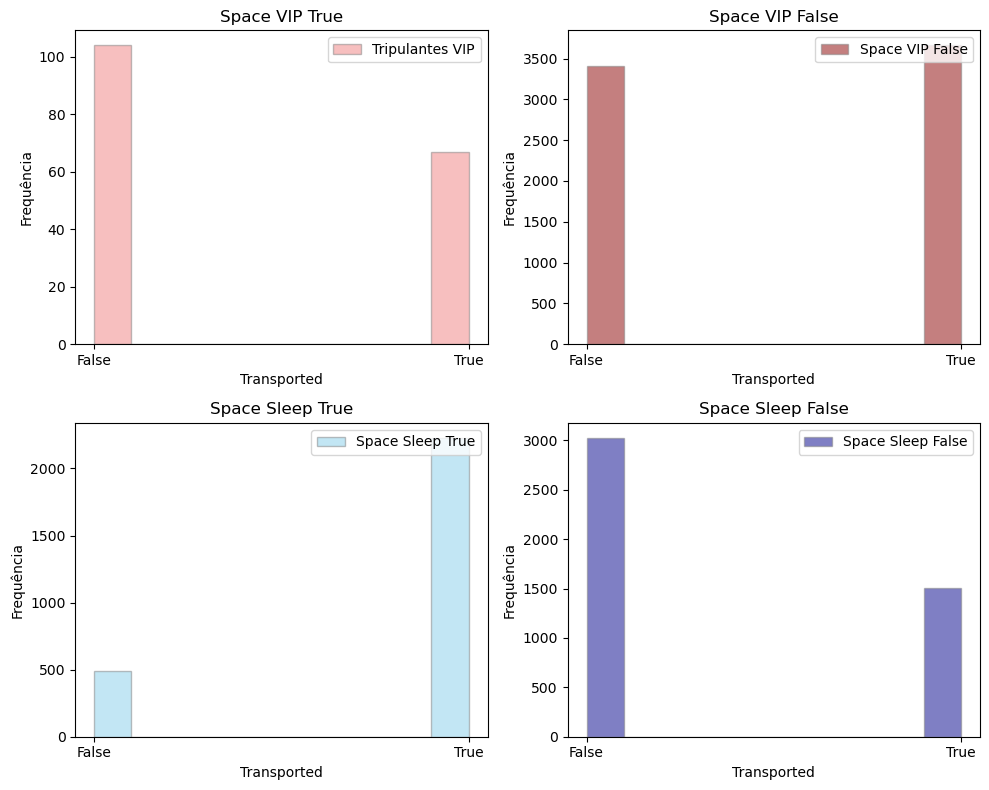

In [45]:
def plot_hist(ax, data, label, title, color):
    ax.hist(data, alpha=0.5, label=label, edgecolor='grey', color=color)
    ax.set_title(title)
    ax.set_xlabel('Transported')
    ax.set_ylabel('Frequência')
    ax.legend(loc='upper right')

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plot_hist(axs[0, 0], df_space_vip_true.sort_values("Transported")["Transported"], 'Tripulantes VIP', 'Space VIP True', 'lightcoral')
plot_hist(axs[0, 1], df_space_vip_false.sort_values("Transported")["Transported"], 'Space VIP False', 'Space VIP False', 'darkred')
plot_hist(axs[1, 0], df_space_Sleep_true.sort_values("Transported")["Transported"], 'Space Sleep True', 'Space Sleep True', 'skyblue')
plot_hist(axs[1, 1], df_space_Sleep_false.sort_values("Transported")["Transported"], 'Space Sleep False', 'Space Sleep False', 'darkblue')

plt.tight_layout()
plt.show()


A hipótese do VIP se mostrou falha. Entretanto, tanto o facto de o tripulante estar acordado aparentemente influencia o facto de ter conseguido se salvar.<n>
Mais expressiva ainda é a distribuição dos Tripulantes em cryosleep, nos quais mais de 80% foram transportados.<n>

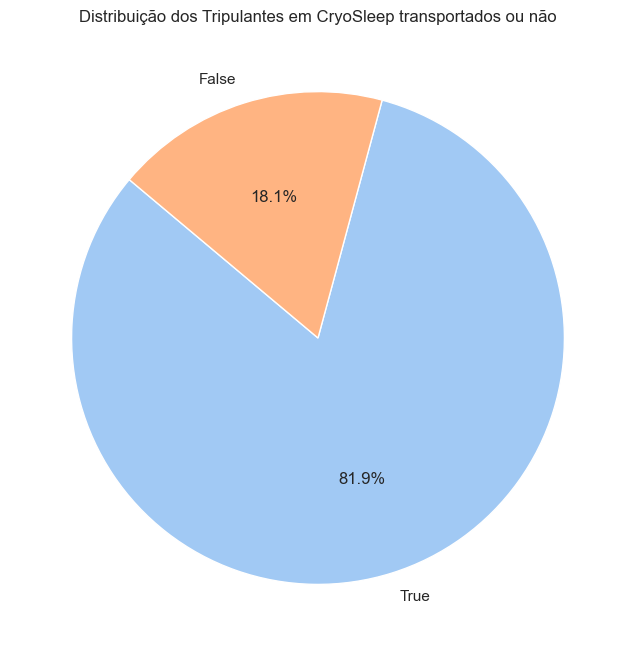

In [46]:
sleep_counts = df_space_Sleep_true['Transported'].value_counts()


plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(sleep_counts, labels=sleep_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribuição dos Tripulantes em CryoSleep transportados ou não')
plt.show()

Tentamos também descobrir se há alguma correlação entre o planeta de destino dos tripulantes e o target

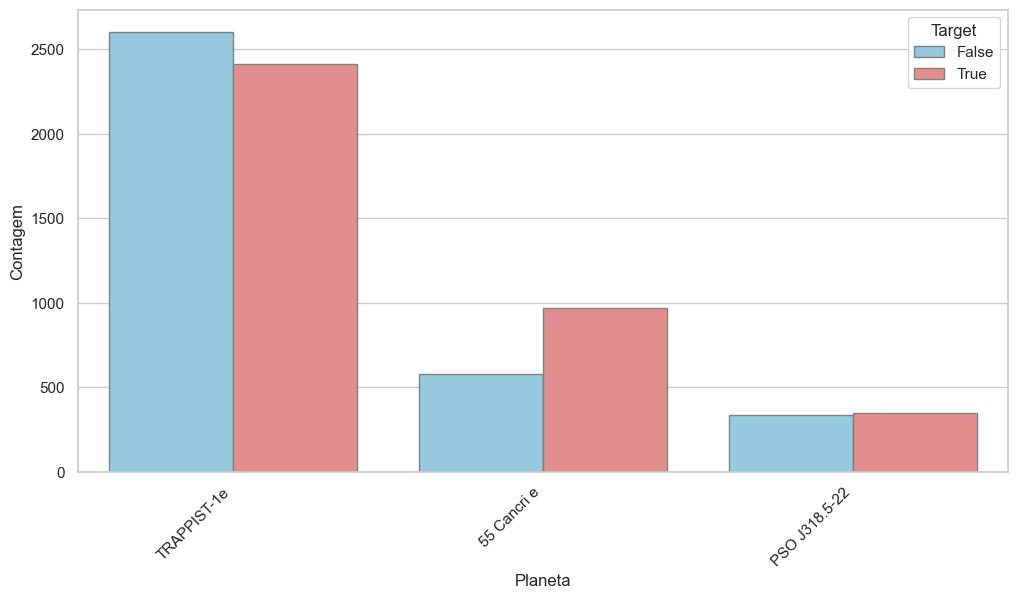

In [47]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Destination', hue='Transported', data=df_space, palette=['skyblue', 'lightcoral'],edgecolor='grey', order=df_space['Destination'].value_counts().index)

plt.title('')
plt.xlabel('Planeta')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target')

plt.show()

Os resultados não foram tão expressivos, exceto em 55 Cancri e, onde a quantidade de transportados é relativamente maior que o número de não transportados, o motivo não conseguimos identificar.

Uma possível explicação possa ser o facto de este ser o destino cuja quantidade de Europeanos seja a com maior porcentagem. Para entender, voltamos nossa análise ao planeta natal dos tripulantes.

A maioria dos tripulantes vêm da Terra, o que faz sentido, dado que a nave partiu daqui.

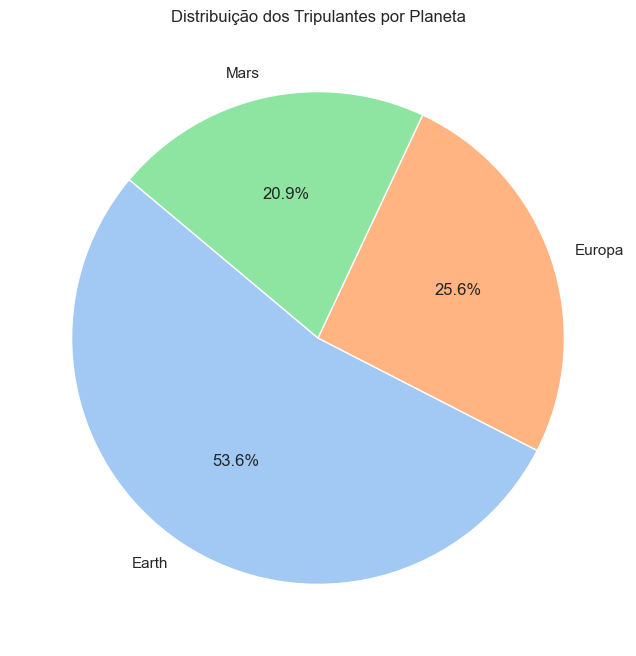

In [48]:
data = df_space['Departure'].value_counts()


plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribuição dos Tripulantes por Planeta')
plt.show()

Analizando a distribuição da origem dos tripulantes em cada deck, percebemos que os europeanos dominam os 3 decks superiores, os marcianos dividem os 3 decks do meio com europeanos e terráqueos, sendo que estes são os únicos presentes no deck inferior. <n>

Quanto ao deck T, não há informações de tripulantes o sulficiente para tirarmos muitas conclusões.

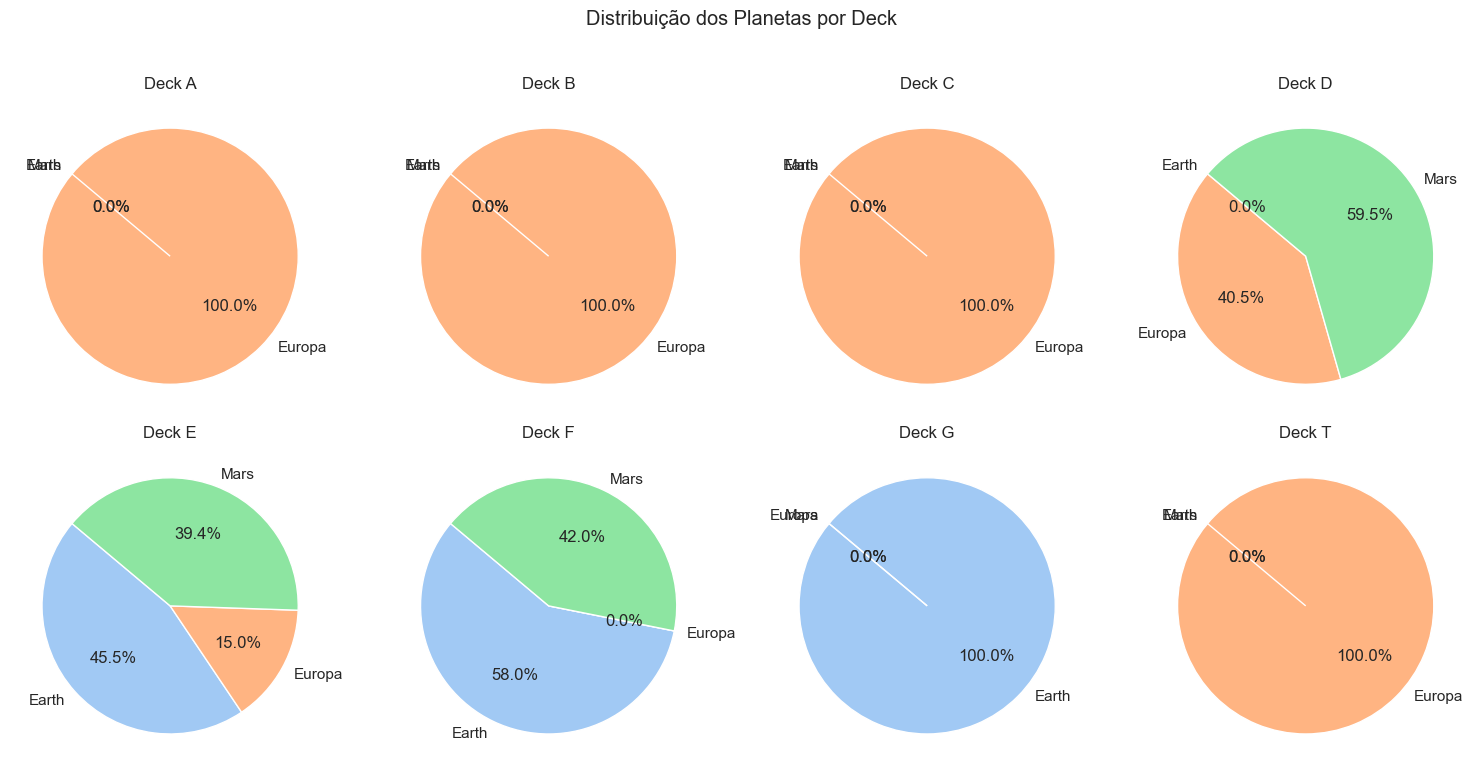

In [49]:
decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Distribuição dos Planetas por Deck')

for deck, ax in zip(decks, axes.flatten()):
    counts = [len(df_space[(df_space['Deck'] == deck) & (df_space['Departure'] == planet)]) for planet in ['Earth', 'Europa', 'Mars']]

    ax.pie(counts, labels=['Earth', 'Europa', 'Mars'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.set_title(f'Deck {deck}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Ao observar a quantidade de tripulantes em cada deck, ela condiz com o que é apresentado nos últimos dois gráficos.

Os terráqueos, que estão em maior quatidade na nave, predominam os decks F e G, que possuem muito mais triulantes que o restante. O restante se distribui nos decks superiores.

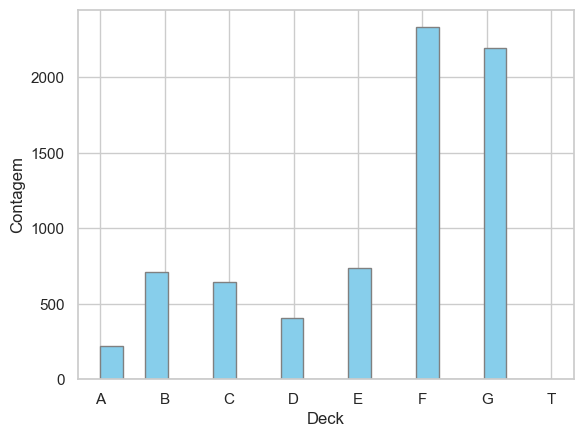

In [50]:
plt.hist(df_space.sort_values('Deck')['Deck'], bins=20, color='skyblue',edgecolor='grey', label=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.xlabel('Deck')
plt.ylabel('Contagem')
plt.show()

A seguir observamos que o deck onde o tripulante estava hospedado era relevante para descobir se este foi ou não transportado, uma vez que, embora alguns possuam valores equilibrados, no deck B e C a quantidade de transportados é bem superior, enquanto que no deck E esta relação é inversa.

O curioso é que os decks cuja quantidade de tripulantes transportada é superior são aqueles ocupados por europeanos, enquanto que aquele com a menor quantidade é ocupada por grande parte dos marcianos.

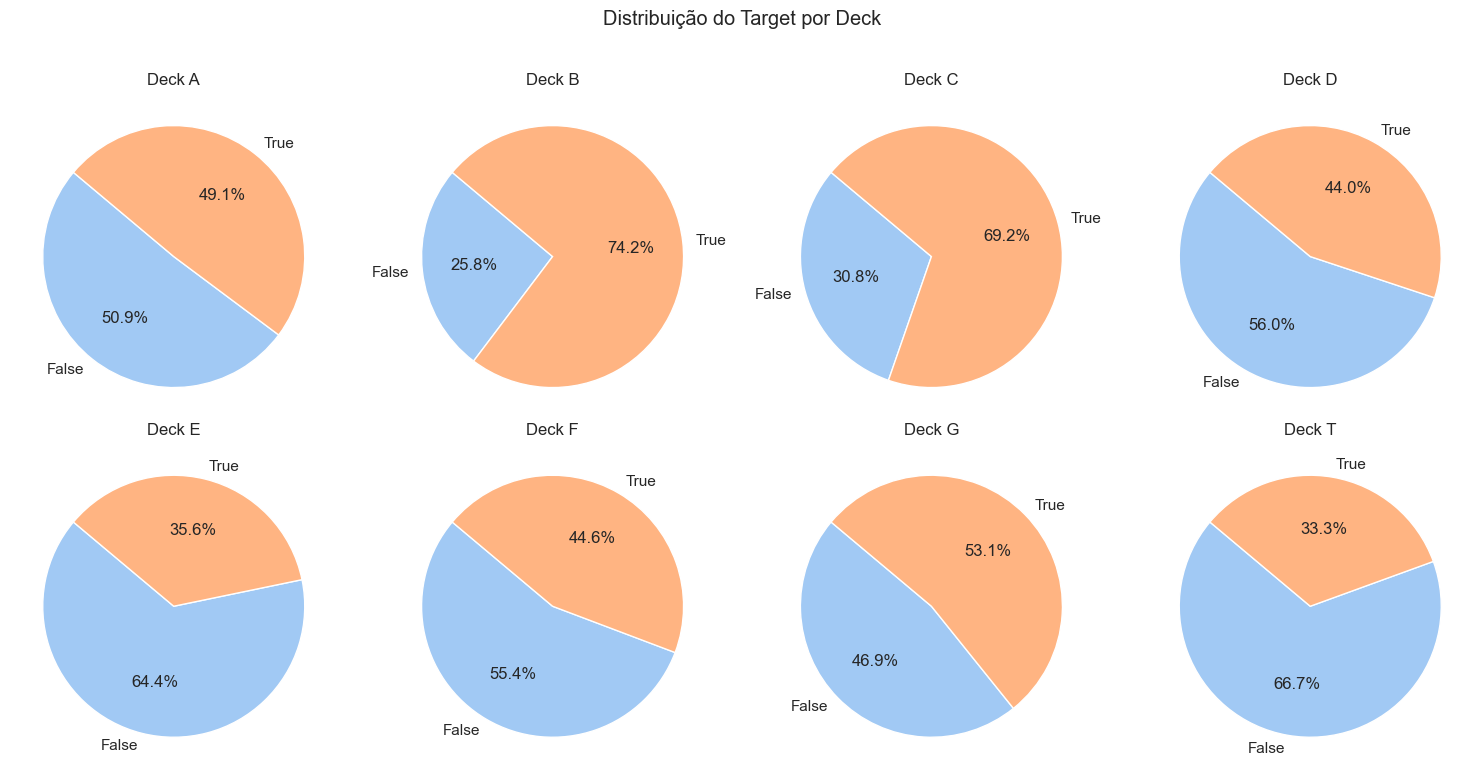

In [51]:
decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Distribuição do Target por Deck')

for deck, ax in zip(decks, axes.flatten()):
    counts = [len(df_space[(df_space['Deck'] == deck) & (df_space['Transported'] == value)]) for value in ['False','True']]

    ax.pie(counts, labels=['False','True'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.set_title(f'Deck {deck}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
 

Aqui confirmamos esse facto, mais da metade dos europeanos foram tranportados, enquanto que marcianos e terráqueos apresentam valores mais iguais.

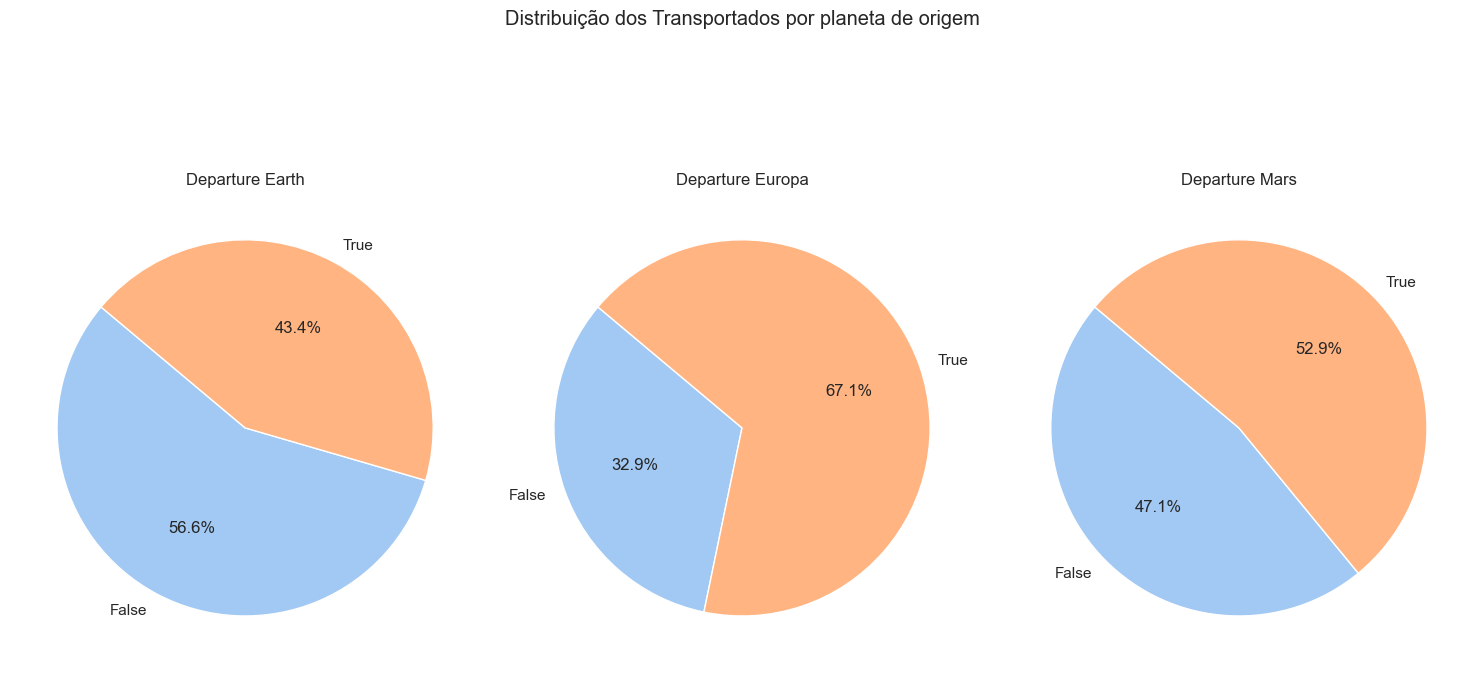

In [52]:
departures = ['Earth','Europa','Mars']

sns.set(style="whitegrid")
fig, axes = plt.subplots(1,3, figsize=(15, 8))
fig.suptitle('Distribuição dos Transportados por planeta de origem')

for deck, ax in zip(departures, axes.flatten()):
    counts = [len(df_space[(df_space['Departure'] == deck) & (df_space['Transported'] == value)]) for value in ['False', 'True']]

    ax.pie(counts, labels=['False','True'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.set_title(f'Departure {deck}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Para entender o porquê de isso acontecer, vamos tentar entender um pouco como é a sociedade neste cenário futurista através dos dados que possuímos.

Embora estejam presentes em maior quantidade na nave, não há nenhum passageiro VIP que seja terráqueo. Além da grande maioria serem europeanos.

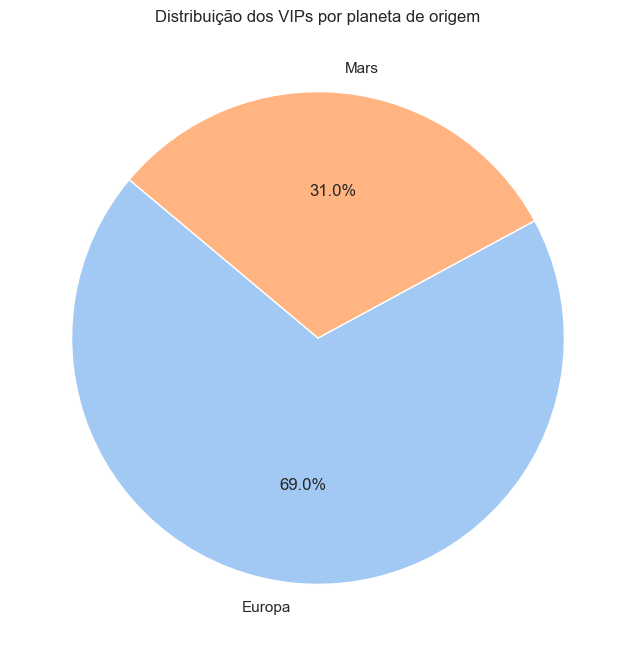

In [53]:
data = df_space_vip_true['Departure'].value_counts()


plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribuição dos VIPs por planeta de origem')
plt.show()

In [54]:
df_grouped_Departure_Sleep_true = df_space_Sleep_true[['Departure','RoomService','Catering',"Shopping","Spa","VR","Total"]].groupby('Departure').mean()
df_grouped_Departure_Sleep_false = df_space_Sleep_false[['Departure','RoomService','Catering',"Shopping","Spa","VR","Total"]].groupby('Departure').mean()

df_grouped_Departure_Sleep_false

,RoomService,Catering,Shopping,Spa,VR,Total
Departure,,,,,,
Earth,199.996942,197.126529,193.952217,207.873089,197.492737,996.441514
Europa,233.434353,2730.068115,279.445212,1475.014808,1519.384008,6237.346496
Mars,903.434928,83.181313,513.470523,183.068966,77.645161,1760.800890


Não só são os que mais compraram passagens VIP, mas os europeanos também são os que mais gastam no navio, sendo os responsáveis por cerca de 60% dos gastos totais, cerca de 90% dos gastos na restauração e 80% dos gastos no spa e no VR, todos luxos que o navio oferece aos tripulantes

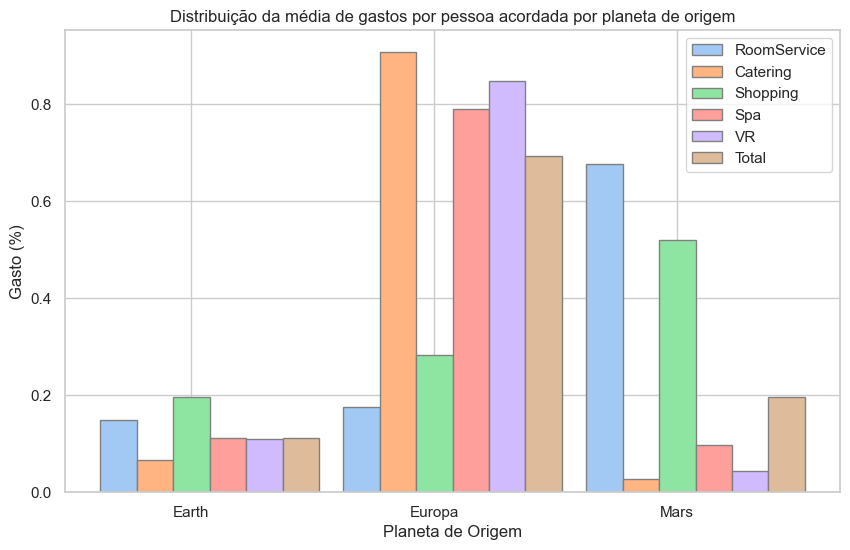

In [55]:
for column in df_grouped_Departure_Sleep_false.columns:
    soma = df_grouped_Departure_Sleep_false[column].sum()
    df_grouped_Departure_Sleep_false[column]=df_grouped_Departure_Sleep_false[column]/soma
    
palette = sns.color_palette("pastel")

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
bar_positions = range(len(df_grouped_Departure_Sleep_false.index))

for i, column in enumerate(df_grouped_Departure_Sleep_false.columns):
    ax.bar([pos + i * bar_width for pos in bar_positions], df_grouped_Departure_Sleep_false[column], width=bar_width, label=column, color=palette[i], edgecolor='grey')

ax.set_xlabel('Planeta de Origem')
ax.set_ylabel('Gasto (%)')
ax.set_title('Distribuição da média de gastos por pessoa acordada por planeta de origem')
ax.set_xticks([pos + bar_width + 0.15 for pos in bar_positions])
ax.set_xticklabels(df_grouped_Departure_Sleep_false.index)
ax.legend()

plt.show()

Estes valores nos fazem crer que neste cenário existe uma desigualdade social entre os planetas.
 

Acreditamos que os mais ricos estejam habitando a Europa, enquanto na Terra estejam os mais pobres. Marte por outro lado aparenta ser mais equilibrado, mas ainda melhor que a Terra.

Seguindo este raciocínio, o serviço de quarto diz respeito a uma espécie de delivery de comida, uma vez que na maior parte dos casos, quem gasta na restauração não gasta tanto no serviço de quarto, e vice-versa.

Text(0.5, 1.0, 'Serviço de quarto vs Restauração')

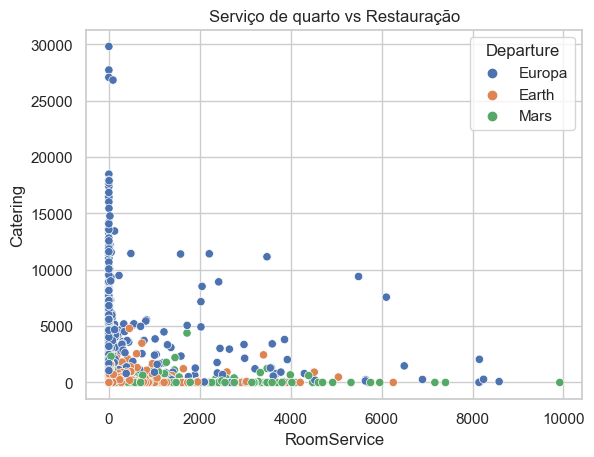

In [56]:
sns.scatterplot(data=df_space, x="RoomService", y="Catering", hue="Departure")
plt.title("Serviço de quarto vs Restauração")

Com essas ideias em mente, concluímos que a restauração é mais um tipo de luxo, e as refeições mais baratas são as do serviço de quarto, dado que quem utiliza do catering mais vezes são os europeanos, enquanto que quem predomina no serviço de quarto são os marcianos e terráqueos.

Com o direcionamento nos valores gastos pelos tripulantes durante a viajem, é possível fazer mais análises interessantes.

Observando agora a media dos gastos para aqueles transportados e não transportados, observamos que a variável criada anteriormente para guardar o valor total gasto apresenta valores similares para ambos os grupos.


Entretanto, as restantes apresentam valores interessantes. Em média, os transportados gastam mais na restauração e no shopping, enquanto os não transportados gastaram mais em spa, VR e serviço de quarto. 

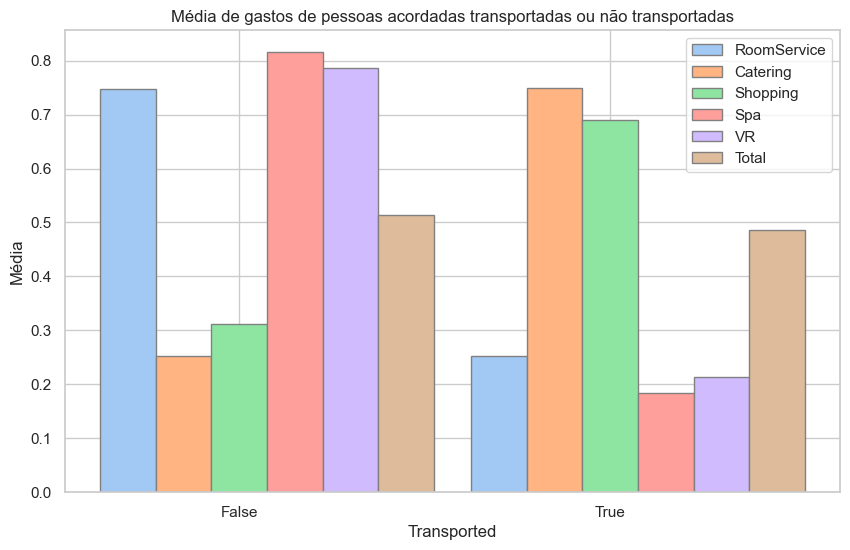

In [57]:
# Calcula a média dos gastos
df_grouped_transported = df_space_Sleep_false[['Transported','RoomService','Catering',"Shopping","Spa","VR","Total"]].groupby('Transported').mean()
for column in df_grouped_transported.columns:
    soma = df_grouped_transported[column].sum()
    df_grouped_transported[column] = df_grouped_transported[column] / soma


palette = sns.color_palette("pastel")

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
bar_positions = range(len(df_grouped_transported.index))

for i, column in enumerate(df_grouped_transported.columns):
    ax.bar([pos + i * bar_width for pos in bar_positions], df_grouped_transported[column], width=bar_width, label=column, color=palette[i], edgecolor='grey')

ax.set_xlabel('Transported')
ax.set_ylabel('Média')
ax.set_title('Média de gastos de pessoas acordadas transportadas ou não transportadas')
ax.set_xticks([pos + bar_width + 0.15 for pos in bar_positions])
ax.set_xticklabels(df_grouped_transported.index)
ax.legend()

plt.show()


Utilizando um violin plot para observar a distribuição destes gastos, a análise anterior é reforçada:


<h>Ninguém que tenha gasto a partir de 5000 em serviço de quarto, spa ou VR foi transportado<h>


Todos que tenham gasto mais de 20000 na restauração, ou 15000 no shopping foram transportados.

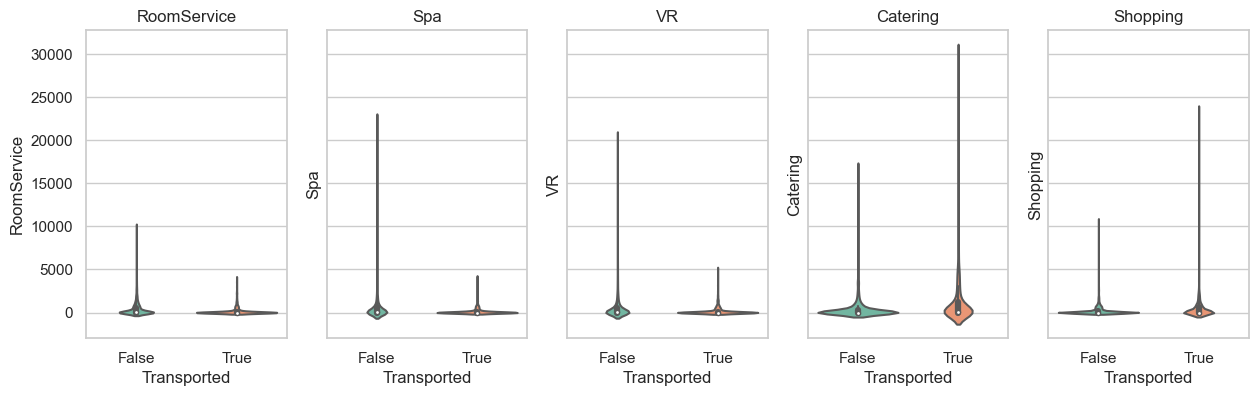

In [58]:
gastos = ['RoomService','Spa','VR','Catering','Shopping']
fig, axes = plt.subplots(nrows=1, ncols=len(gastos), figsize=(15, 4), sharey=True)

for i, gasto in enumerate(gastos):
    sns.violinplot(x='Transported', y=gasto, data=df_space_Sleep_false, palette='Set2', ax=axes[i])
    axes[i].set_title(gasto)

Decidimos que seria melhor para o machine learnign não incluir a variável Total, uma vez que ela não divide muito bem nosso target

In [59]:
df_space['Total_RSV'] = df_space['RoomService'] + df_space['Spa'] + df_space['VR']

No lugar dela testamos fazer apenas o total das variávels RoomService, Spa e VR, o que se provou bom para os modelos

Esta relação pode parecer um tanto contraintuitiva, uma vez entendemos que o serviço de quarto não é necessariamente um luxo, ao contrário do spa e VR.

A nossa hipótese é que a colisão que causou todos estes problemas aconteceu no lugar onde está localizada a restauração e o shopping, uma vez que faz sentido estes dois lugares estarem juntos, o que explica o porquê de aqueles com gastos elevados nestes locais tenham sido transportados: a chance de eles estarem ali no momento da colisão era elevada.

O raciocínio contrário vale também para o restante: gastos no spa e VR levam a crer que a pessoa passava algum tempo nestes lugares não afetados e, por sorte, ficaram ilesas, assim como gastos com serviço de quarto representam que aquele tripulante passava tempo no quarto.

Para finalizar a análise sobre os gastos, o gráfico abaixo (ou a ausencia dele), mostra que as pessoas em CryoSleep não gastaram nada durante a viagem. O que nos leva a crer que o tripulante era posto neste estado no momento do embarque e permanece assim até chegar ao seu destino.

Esta informação nos permitiu substituir alguns nulos como foi dito anteriormente no data wrangling.

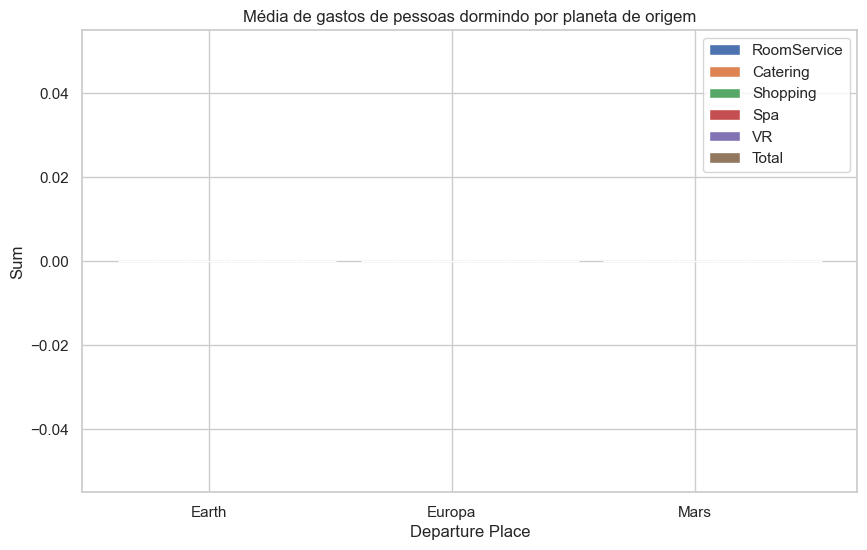

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
bar_positions = range(len(df_grouped_Departure_Sleep_true.index))
for i, column in enumerate(df_grouped_Departure_Sleep_true.columns):
    ax.bar([pos + i * bar_width for pos in bar_positions], df_grouped_Departure_Sleep_true[column], width=bar_width, label=column)

ax.set_xlabel('Departure Place')
ax.set_ylabel('Sum')
ax.set_title('Média de gastos de pessoas dormindo por planeta de origem')
ax.set_xticks([pos + bar_width+0.15 for pos in bar_positions])
ax.set_xticklabels(df_grouped_Departure_Sleep_true.index)
ax.legend()

plt.show()

Com estas informações, é plausível acreditar que o tripulante adormecido não tenha autonomia pra sair deste estado, e estivesse dependente de ajuda externa, fator que pode ter contribuído para que tantos tripulantes em CryoSleep tenham sido transportados.

Falando dos lados do navio, a distribuição de pessoas é praticamente equivalente entre os dois.

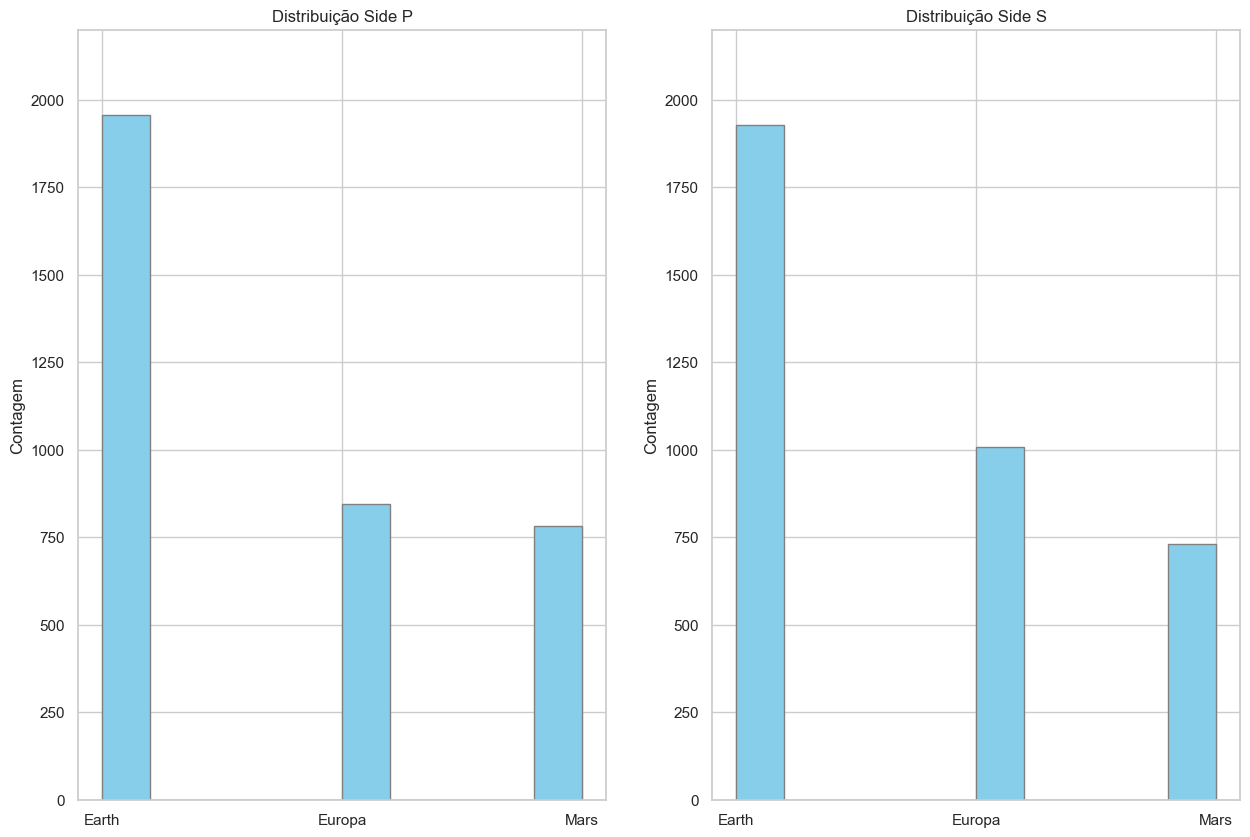

In [61]:
def plot_hist(ax, data, title, ylabel):
    ax.hist(data, color='skyblue', edgecolor='grey')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim([0, 2200])

fig, axis = plt.subplots(1, 2, figsize=(15, 10))

side_p_data = df_space_Side_P.sort_values("Departure")['Departure']
side_s_data = df_space_Side_S.sort_values("Departure")['Departure']

plot_hist(axis[0], side_p_data, 'Distribuição Side P', 'Contagem')
plot_hist(axis[1], side_s_data, 'Distribuição Side S', 'Contagem')

plt.show()


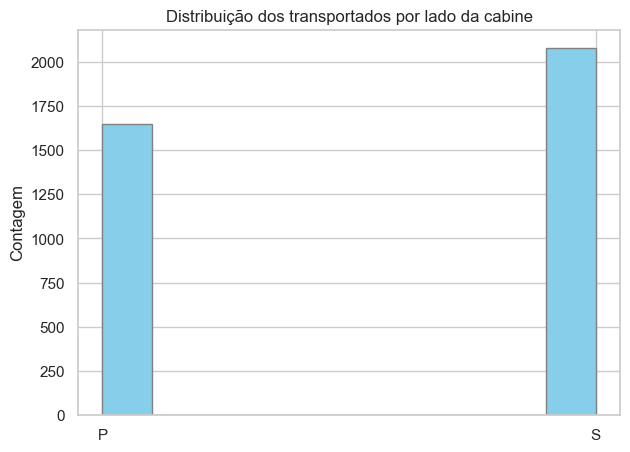

In [62]:
fig, axis = plt.subplots(1, figsize=(7, 5))
axis.hist(df_space_transported_true.sort_values('Side')['Side'], color='skyblue', edgecolor='grey')
axis.set_title('Distribuição dos transportados por lado da cabine')
plt.ylabel('Contagem')
plt.show()

A diferença entre os transportados também não é muito importante.

Durante os testes com os modelos no machine learning esta variável não influenciou muito nos resultados.

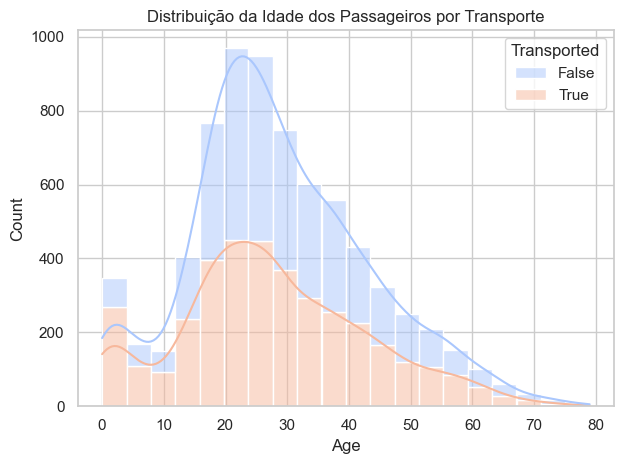

In [63]:

sns.set(style="whitegrid")
sns.histplot(data=df_space, x='Age', bins=20, kde=True, hue='Transported', palette="coolwarm", multiple="stack")
plt.title('Distribuição da Idade dos Passageiros por Transporte')
plt.tight_layout()
plt.show()


O mesmo vale para a idade, não foi uma variável muito importante para o machine learning.

<h2> Machine Learning <h2>

Confirmamos as correlações que vimos anteriormente

In [64]:
le_departure = LabelEncoder().fit(["Earth","Mars","Europa",np.nan])
le_destination = LabelEncoder().fit(["TRAPPIST-1e","55 Cancri e","PSO J318.5-22",np.nan])
le_deck = LabelEncoder().fit(["A","B","C","D","E","F","G","T",np.nan])
le_boolean = LabelEncoder().fit(["True","False",np.nan])


df_space["Departure"] = le_departure.transform(df_space["Departure"])
df_space["Sleep"] = le_boolean.transform(df_space["Sleep"])
df_space["Destination"] = le_destination.transform(df_space["Destination"])
df_space["VIP"] = le_boolean.transform(df_space["VIP"])
df_space["Deck"] = le_deck.transform(df_space["Deck"])
#df_space["Side"] = le.fit_transform(df_space["Side"])
df_space["Transported"] = le_boolean.transform(df_space["Transported"])

In [65]:
df_space.drop("PassengerId",axis=1,inplace=True)
df_space.drop("Group",axis=1,inplace=True)
df_space.drop("Total",axis=1,inplace=True)
df_space.drop("Side",axis=1,inplace=True)
df_space.drop("Age",axis=1,inplace=True)

df_space.drop("Num",axis=1,inplace=True)

df_space.drop("VR",axis=1, inplace=True)
df_space.drop("RoomService",axis=1, inplace=True)
df_space.drop("Spa",axis=1, inplace=True)

df_space.reset_index(drop=True, inplace=True)

Retiramos as colunas que não servirão ao machine learning

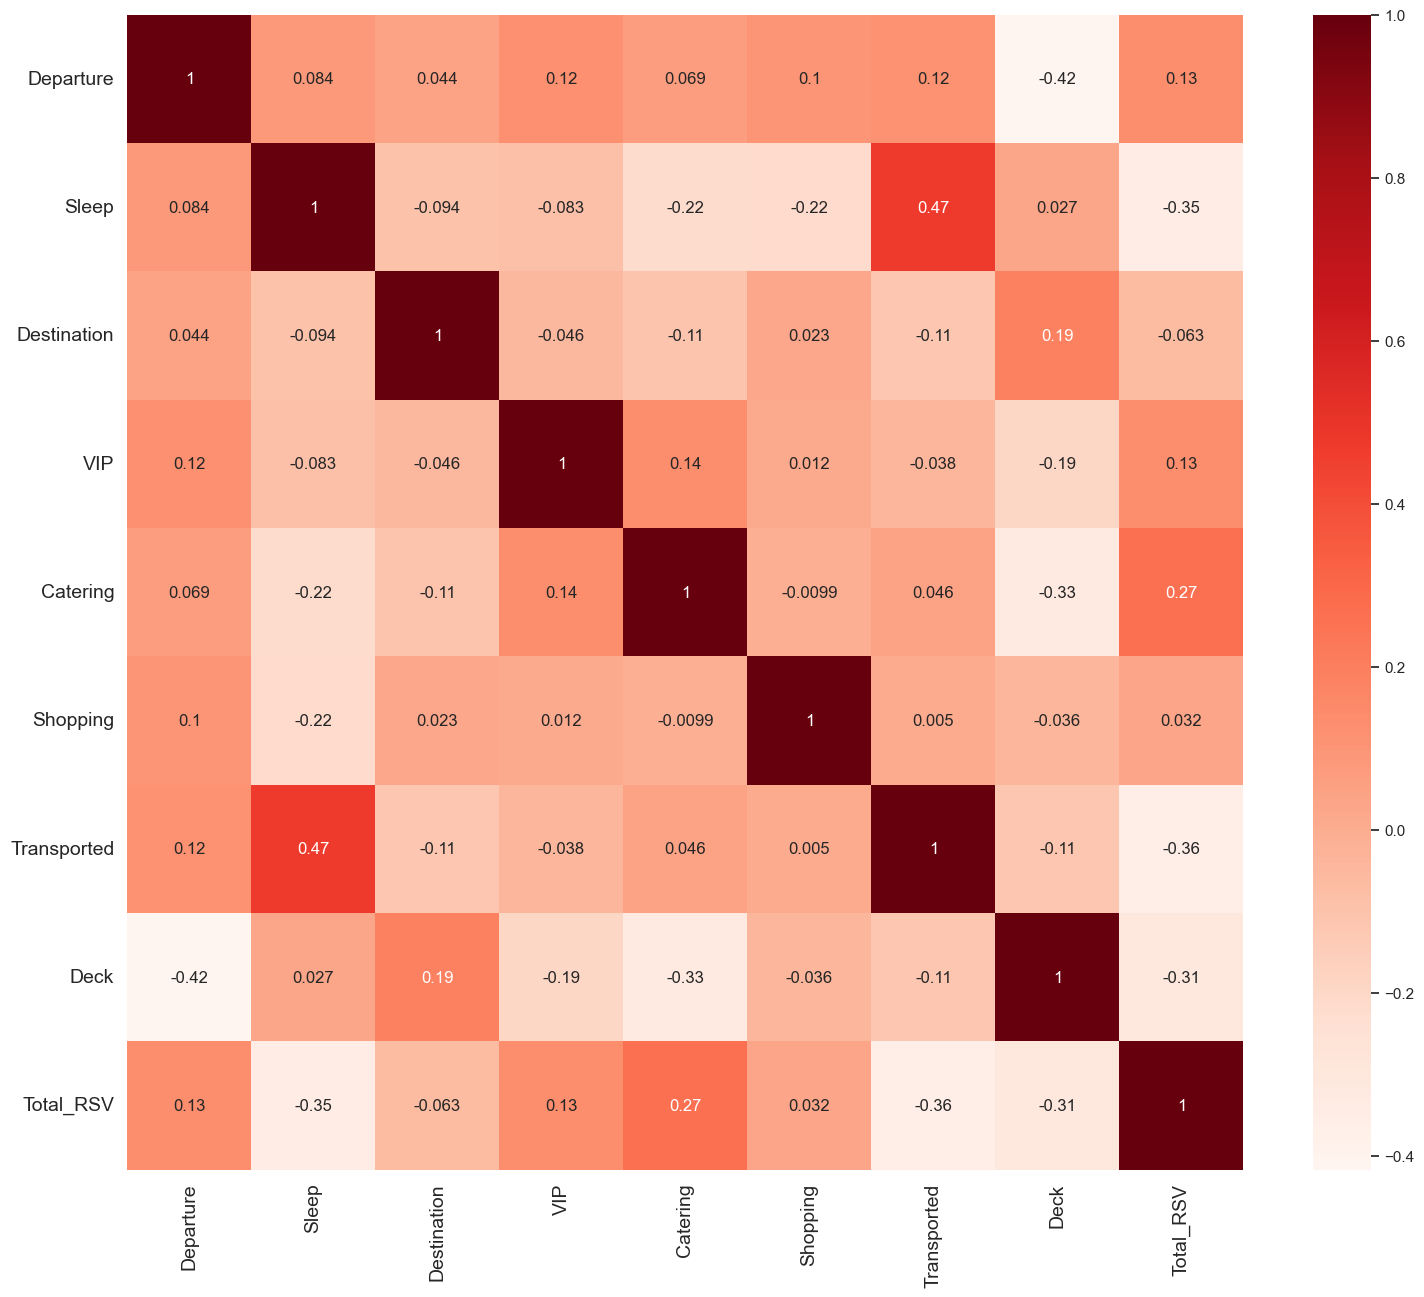

In [66]:
sns.heatmap(df_space.corr(),annot=True,cmap='Reds',xticklabels=True, yticklabels=True)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [67]:
df_space = df_space.sort_index()

Encoder para os valores categóricos

In [68]:
X = df_space.drop("Transported", axis=1)
y = df_space["Transported"]

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Após alguns testes, percebemos que a maioria dos modelos lidava melhor com os valores normalizados

O primeiro modelo testado foi uma decision tree

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [102]:
X_pca

array([[-9.33066374e+02,  9.40015877e+01, -1.64794562e+02,
        -3.53095719e+00],
       [-3.54259730e+02, -3.03846058e+02, -1.50350559e+02,
         7.43223880e-01],
       [ 6.68994424e+03, -9.09982523e+02, -2.33699165e+02,
        -1.85618847e+00],
       ...,
       [-9.19416622e+02,  6.24192461e+01,  1.70688888e+03,
         1.73689847e+00],
       [ 2.60291445e+03, -1.11802643e+03, -2.09119842e+02,
         3.51352362e-01],
       [ 1.88358165e+03,  3.84380687e+03, -1.21992840e+02,
         7.46296691e-01]])

In [103]:
import plotly.express as px
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y, width=800, height=600)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="PCA1",
    yaxis_title="PCA2",
)
fig.show()

In [141]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=1000, early_exaggeration=20, random_state=1, n_jobs=-1)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

0.12168307602405548

In [142]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y, width=800, height=600)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

In [144]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': range(3,10),
    'criterion': ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=1)

# Step 4: Use GridSearchCV
gsdt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Step 5: Fit the model
gsdt.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters found: {gsdt.best_params_}")

Best parameters found: {'criterion': 'gini', 'max_depth': 7}


In [145]:
y_pred = gsdt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       706
           1       0.77      0.82      0.80       744

    accuracy                           0.79      1450
   macro avg       0.79      0.79      0.79      1450
weighted avg       0.79      0.79      0.79      1450



Text(0.5, 20.049999999999997, 'Predicted label')

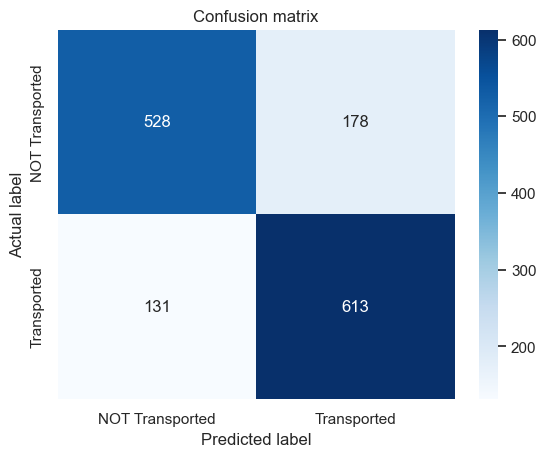

In [146]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm, index=['NOT Transported', 'Transported'],columns=['NOT Transported','Transported']), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Entretanto, como há uma grande variância nos valores dos gastos, que, antes da normalização, vão de muitos 0 a valores altos como 30000, pode ser que aplicar um bagging ao modelo ajude a melhorar estes valores, para isso testamos uma random forest a seguir.

In [123]:
param_grid = {
    'n_estimators': [5,50,100,200],
    'max_depth': [3, 10, 20, 40],
    'bootstrap': [True, False],
    'criterion': ["gini", "entropy"]
}


rf = RandomForestClassifier(random_state=42)

gsrf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)


gsrf.fit(X_train,y_train)


print(f"Best parameters found: {gsrf.best_params_}")

Best parameters found: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}


In [124]:
y_pred = gsrf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.76      0.79       706
           1       0.79      0.83      0.81       744

    accuracy                           0.80      1450
   macro avg       0.80      0.80      0.80      1450
weighted avg       0.80      0.80      0.80      1450



A melhoria é visível, embora seja "apenas" 1%, já é algo relevante.

Text(0.5, 20.049999999999997, 'Predicted label')

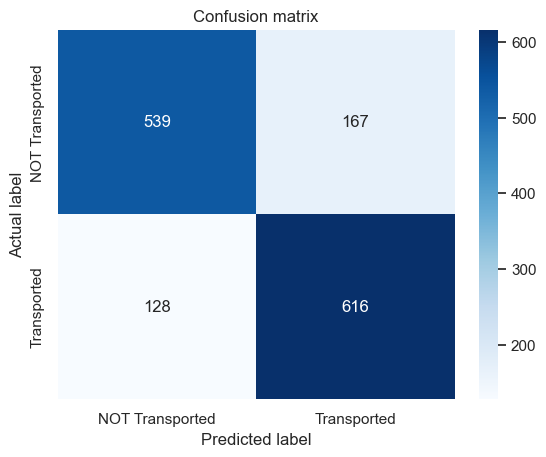

In [125]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm, index=['NOT Transported', 'Transported'],columns=['NOT Transported','Transported']), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Os resultados de ambos os modelos foram aceitáveis. As entradas que o modelo mais errou foram os falsos positivos. O que pode ser bom sinal é que o serviço espacial quer descobir os positivos e foi onde o modelo errou menos (falsos negativos).

In [126]:
param_grid = {
    'n_neighbors': range(5,100),
    'weights': ['uniform','distance'],
    'algorithm': ['ball_tree','kd_tree']
}


kn = KNeighborsClassifier(n_jobs=-1)


rskn = RandomizedSearchCV(estimator=kn, param_distributions=param_grid, cv=5, n_jobs=-1, n_iter=100)


rskn.fit(X_train,y_train)


print(f"Best parameters found: {rskn.best_params_}")

Best parameters found: {'weights': 'uniform', 'n_neighbors': 23, 'algorithm': 'kd_tree'}


In [127]:
y_pred = rskn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       706
           1       0.79      0.83      0.81       744

    accuracy                           0.80      1450
   macro avg       0.80      0.80      0.80      1450
weighted avg       0.80      0.80      0.80      1450



Text(0.5, 20.049999999999997, 'Predicted label')

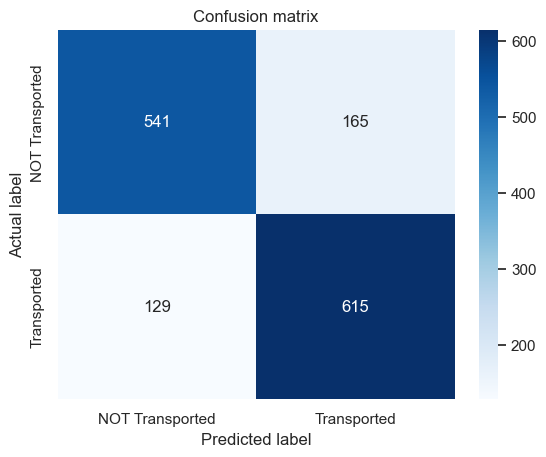

In [128]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm, index=['NOT Transported', 'Transported'],columns=['NOT Transported','Transported']), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Outro modelo testado foi o nearest neighbors, que fez as classificações de maneira similar aos anteriores, mas com resultados piores, decidimos então que ele seria descartado.

In [129]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    'penalty' : ['l2', None], 
    'solver':['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}


lr = LogisticRegression(random_state=42)


gslr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)


gslr.fit(X_train,y_train)


print(f"Best parameters found: {gslr.best_params_}")

Best parameters found: {'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\joaov\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


2 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joaov\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joaov\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joaov\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1302, in fit
    fold_coefs_

In [130]:
y_pred = gslr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       706
           1       0.73      0.68      0.70       744

    accuracy                           0.71      1450
   macro avg       0.71      0.71      0.71      1450
weighted avg       0.71      0.71      0.71      1450



Text(0.5, 20.049999999999997, 'Predicted label')

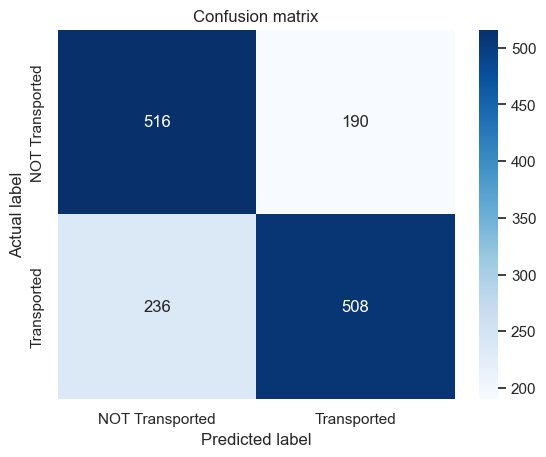

In [131]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm, index=['NOT Transported', 'Transported'],columns=['NOT Transported','Transported']), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

A accuracy total do modelo é pior que a random forest. Entretanto acontece porque ele concentra as classificações para o lado positivo (Transported), possuindo a menor quantidade de falsos negativos. Pelos motivos apresentados acima, decidimos que este também poderia ser útil ao serviço espacial dependendo da abordagem escolhida.

In [132]:
NNencoder = OneHotEncoder()
encoded_data = pd.DataFrame(NNencoder.fit_transform(df_space[['Departure','Destination','Deck']]).toarray())
df_spaceNN = df_space.join(encoded_data).drop(['Departure','Destination','Deck'],axis=1)
df_spaceNN

,Sleep,VIP,Catering,Shopping,Transported,Total_RSV,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,9.0,25.0,1,702.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,3576.0,0.0,0,6807.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1283.0,371.0,0,3522.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,70.0,151.0,1,870.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,0,1,6819.0,0.0,0,1717.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7245,1,0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7246,0,0,0.0,1872.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7247,0,0,1049.0,0.0,0,3588.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [133]:
X = df_spaceNN.drop(['Transported'],axis=1).values
y = df_spaceNN.Transported

In [134]:
X_trainNN, X_testNN, y_trainNN, y_testNN = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y, shuffle=True)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [84]:
ann = Sequential()
input_layer = Dense(units = 12, activation = 'relu', input_dim = 19,name='HL1-relu')
ann.add(input_layer)

ann.add(Dense(units = 12, activation = 'relu',name='HL2-relu'))


ann.add(Dense(units = 24, activation = 'relu',name='HL3-relu'))


ann.add(Dense(units = 36, activation = 'relu',name='HL4-relu'))
ann.add(Dropout(rate = 0.1,name="D1-0.1"))

ann.add(Dense(units = 48, activation = 'relu',name='HL5-relu'))
ann.add(Dropout(rate = 0.2,name="D2-0.2"))


ann.add(Dense(units = 48, activation = 'softplus',name='HL6-softplus'))


ann.add(Dense(units = 60, activation = 'relu',name='HL7-relu'))
ann.add(Dropout(rate = 0.1,name="D3-0.1"))

ann.add(Dense(units = 48, activation = 'softplus',name='HL8-softplus'))

ann.add(Dense(units = 48, activation = 'relu',name='HL9-relu'))
ann.add(Dropout(rate = 0.2,name="D4-0.2"))

ann.add(Dense(units = 36, activation = 'relu',name='HL10-relu'))
ann.add(Dropout(rate = 0.1,name="D5-0.1"))


ann.add(Dense(units = 36, activation = 'relu',name='HL11-relu'))


ann.add(Dense(units = 24, activation = 'relu',name='HL12-relu'))


ann.add(Dense(units = 6, activation = 'relu',name='HL13-relu'))



ann.add(Dense(units = 1, activation = 'sigmoid',name='Output_layer'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

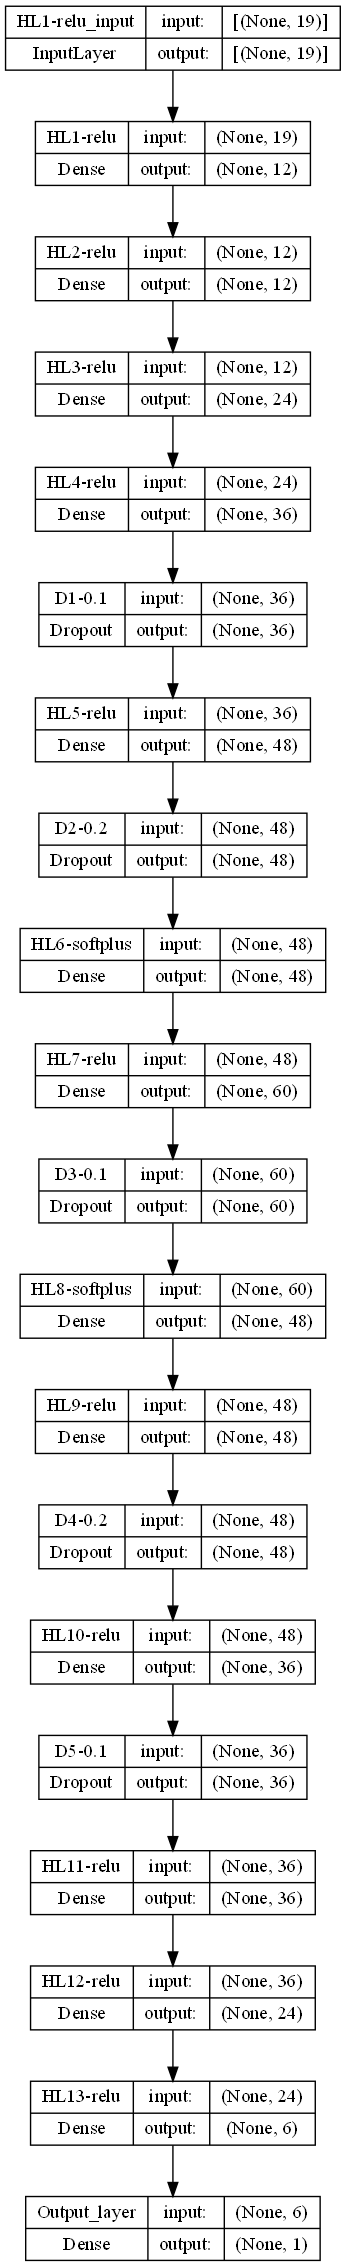

In [85]:

from keras.utils import plot_model

plot_model(ann, show_shapes=True,dpi=100)


In [86]:
history = ann.fit(X_trainNN, y_trainNN, batch_size=3000, epochs = 200, verbose = 1, validation_split=0.2)

Epoch 1/200


2/2 [==============================] - 3s 311ms/step - loss: 2.0331 - accuracy: 0.4117 - val_loss: 0.6781 - val_accuracy: 0.5224
Epoch 2/200
2/2 [==============================] - 0s 54ms/step - loss: 1.0559 - accuracy: 0.4626 - val_loss: 0.7720 - val_accuracy: 0.5034
Epoch 3/200
2/2 [==============================] - 0s 50ms/step - loss: 0.9776 - accuracy: 0.4781 - val_loss: 0.7358 - val_accuracy: 0.5034
Epoch 4/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8789 - accuracy: 0.4844 - val_loss: 0.6988 - val_accuracy: 0.5034
Epoch 5/200
2/2 [==============================] - 0s 45ms/step - loss: 0.7877 - accuracy: 0.5025 - val_loss: 0.6708 - val_accuracy: 0.5009
Epoch 6/200
2/2 [==============================] - 0s 43ms/step - loss: 0.7241 - accuracy: 0.5219 - val_loss: 0.6525 - val_accuracy: 0.5009
Epoch 7/200
2/2 [==============================] - 0s 47ms/step - loss: 0.7077 - accuracy: 0.5402 - val_loss: 0.6532 - val_accuracy: 0.7526
Epoch 8/200
2/2 [

Epoch 56/200
2/2 [==============================] - 0s 42ms/step - loss: 0.5093 - accuracy: 0.7806 - val_loss: 0.4853 - val_accuracy: 0.8000
Epoch 57/200
2/2 [==============================] - 0s 45ms/step - loss: 0.5049 - accuracy: 0.7810 - val_loss: 0.4858 - val_accuracy: 0.7983
Epoch 58/200
2/2 [==============================] - 0s 46ms/step - loss: 0.5034 - accuracy: 0.7823 - val_loss: 0.4863 - val_accuracy: 0.7983
Epoch 59/200
2/2 [==============================] - 0s 45ms/step - loss: 0.5045 - accuracy: 0.7808 - val_loss: 0.4867 - val_accuracy: 0.7983
Epoch 60/200
2/2 [==============================] - 0s 44ms/step - loss: 0.5068 - accuracy: 0.7795 - val_loss: 0.4863 - val_accuracy: 0.8000
Epoch 61/200
2/2 [==============================] - 0s 44ms/step - loss: 0.5031 - accuracy: 0.7859 - val_loss: 0.4856 - val_accuracy: 0.8000
Epoch 62/200
2/2 [==============================] - 0s 44ms/step - loss: 0.5009 - accuracy: 0.7838 - val_loss: 0.4847 - val_accuracy: 0.8009
Epoch 63/200


2/2 [==============================] - 0s 44ms/step - loss: 0.4393 - accuracy: 0.7920 - val_loss: 0.4279 - val_accuracy: 0.8052
Epoch 115/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4320 - accuracy: 0.7898 - val_loss: 0.4276 - val_accuracy: 0.8043
Epoch 116/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4433 - accuracy: 0.7872 - val_loss: 0.4276 - val_accuracy: 0.8043
Epoch 117/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4368 - accuracy: 0.7926 - val_loss: 0.4269 - val_accuracy: 0.8043
Epoch 118/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4372 - accuracy: 0.7928 - val_loss: 0.4267 - val_accuracy: 0.8043
Epoch 119/200
2/2 [==============================] - 0s 45ms/step - loss: 0.4339 - accuracy: 0.7881 - val_loss: 0.4275 - val_accuracy: 0.8043
Epoch 120/200
2/2 [==============================] - 0s 45ms/step - loss: 0.4329 - accuracy: 0.7911 - val_loss: 0.4279 - val_accuracy: 0.8043
Epoch 121/200
2/2 [=

Epoch 172/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4195 - accuracy: 0.7969 - val_loss: 0.4231 - val_accuracy: 0.8129
Epoch 173/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4187 - accuracy: 0.7982 - val_loss: 0.4221 - val_accuracy: 0.8129
Epoch 174/200
2/2 [==============================] - 0s 42ms/step - loss: 0.4219 - accuracy: 0.7948 - val_loss: 0.4221 - val_accuracy: 0.8121
Epoch 175/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4212 - accuracy: 0.7982 - val_loss: 0.4228 - val_accuracy: 0.8112
Epoch 176/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4182 - accuracy: 0.7978 - val_loss: 0.4234 - val_accuracy: 0.8103
Epoch 177/200
2/2 [==============================] - 0s 42ms/step - loss: 0.4187 - accuracy: 0.8013 - val_loss: 0.4230 - val_accuracy: 0.8103
Epoch 178/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4202 - accuracy: 0.8006 - val_loss: 0.4220 - val_accuracy: 0.8112
Epoch 

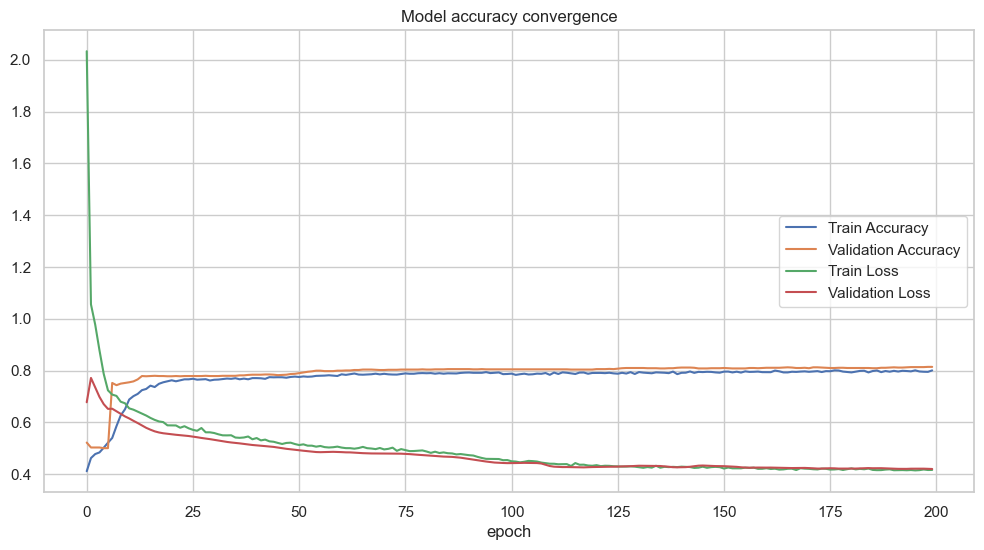

In [87]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy convergence')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy',"Train Loss", "Validation Loss"], loc='center right')
plt.show()


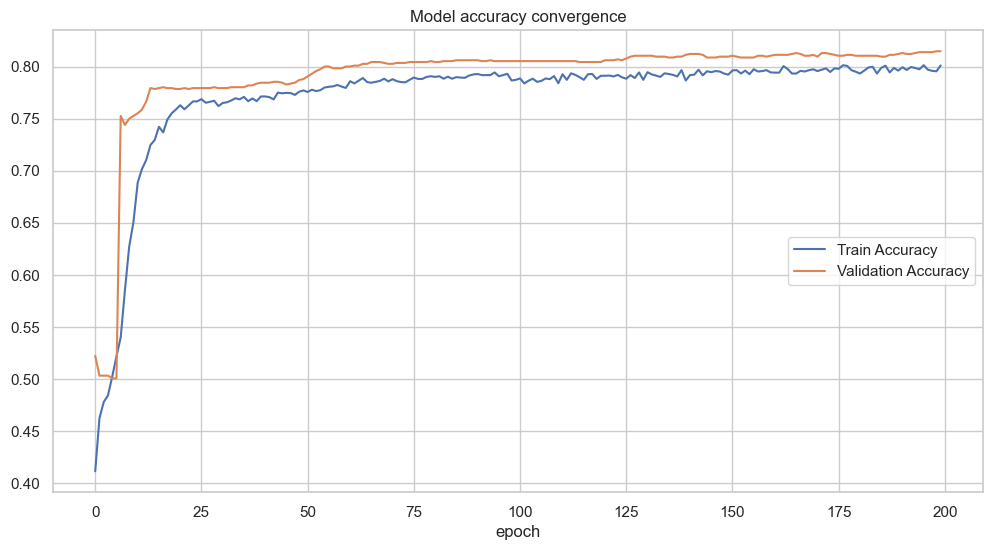

In [88]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy convergence')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='center right')
plt.show()


A convergência da accuracy da rede acontece por volta da 100a época, contudo ainda há uma ligeira melhora até a 200a.

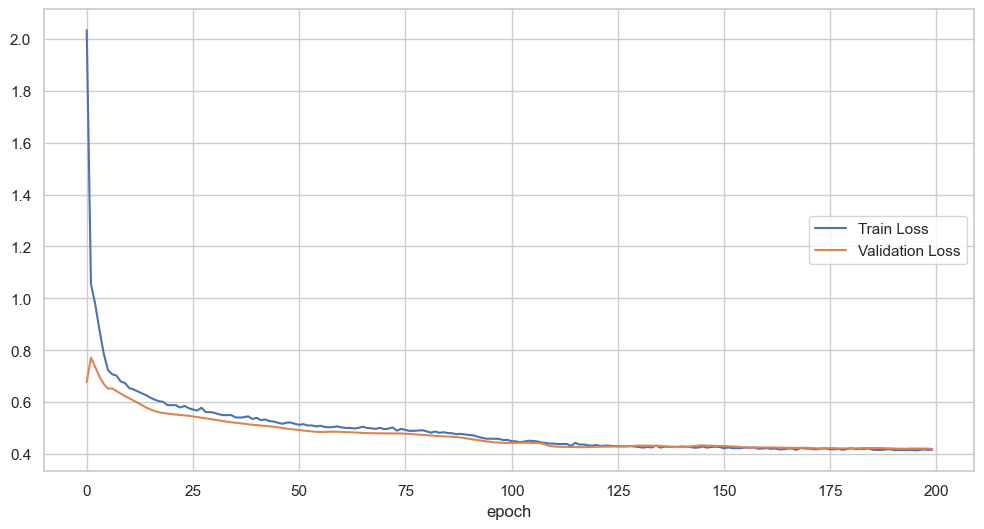

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(["Train Loss", "Validation Loss"], loc='center right')
plt.show()

A partir da 200a para frente já é possível perceber overfitting no modelo.

In [90]:
score, acc = ann.evaluate(X_trainNN, y_trainNN, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

y_predNN = ann.predict(X_testNN)
y_predNN = (y_predNN > 0.5).astype("int32")

print('*'*20)
score, acc = ann.evaluate(X_testNN, y_testNN, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

print(classification_report(y_testNN, y_predNN))

580/580 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.8043
Train score: 0.41573962569236755
Train accuracy: 0.8042765855789185
46/46 [==============================] - 0s 2ms/step
********************
145/145 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8083
Test score: 0.4224875867366791
Test accuracy: 0.8082758784294128
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       704
           1       0.81      0.82      0.81       746

    accuracy                           0.81      1450
   macro avg       0.81      0.81      0.81      1450
weighted avg       0.81      0.81      0.81      1450



Text(0.5, 20.049999999999997, 'Predicted label')

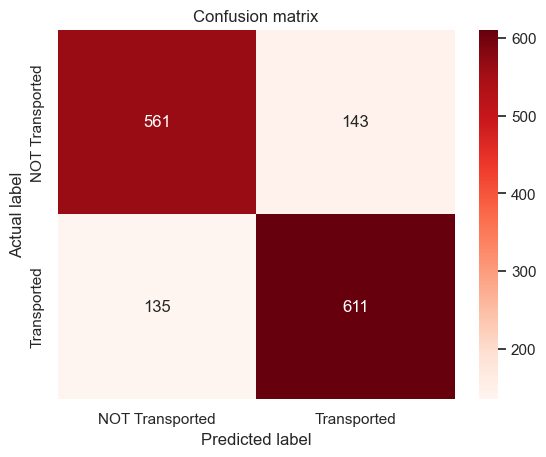

In [91]:
cm = confusion_matrix(y_testNN, y_predNN)
sns.heatmap(pd.DataFrame(cm, index=['NOT Transported', 'Transported'],columns=['NOT Transported','Transported']), annot=True, cmap="Reds" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Quanto a accuracy da rede, ela permanece similar aos outros modelos, o que não é muito indicado, uma vez que é um modelo muito mais custoso para funcionar. Entretanto, é neste modelo que as categorizações entre as classes foram mais equilibradas, por este motivo ela não deve ser descartada de imediato.

# Conclusão

Na visualização, fizemos observações que nos ajudaram a tratar os nulos que encontramos no dataset, assim como identificar quais as melhores variáveis para o nosso modelo.

Tentamos também traçar hipóteses sobre como funciona esta sociedade futurista criada para o ambito da competição, com a lua jupteriana Europa sendo provavelmente o melhor, e mais caro, lugar para se viver.

Com isto em mente observamos o que mais os dados relativos aos gastos poderiam nos dizer e teorizamos que possivelmente o lugar onde o tripulante estava no momento do impacto foi decisivo para seu transporte ou não.

Já no machine learning, nossos resultados foram os seguintes.

In [92]:
data = {
    'Accuracy': [0.80, 0.81, 0.80, 0.80,0.81],
    'Precision Não Transportados':[0.82,0.83,0.81,0.85,0.80],
    'Precision Transportados': [0.78,0.79,0.79,0.76,0.81]
}


df_acc = pd.DataFrame(data)
novo_indice = ['DecisionTree', 'RandomForest', 'KNeighbors', 'LogisticRegression','RedeNeuronal']
df_acc.index = novo_indice
df_acc

,Accuracy,Precision Não Transportados,Precision Transportados
DecisionTree,0.80,0.82,0.78
RandomForest,0.81,0.83,0.79
KNeighbors,0.80,0.81,0.79
LogisticRegression,0.80,0.85,0.76
RedeNeuronal,0.81,0.80,0.81


Mesmo os accuracy dos algoritmos serem similares, percebemos que alguns algoritmos são melhores a classificar certas classes do que outros algoritmos. O melhor algoritmo que classifica os tripulantes que foram não foram transportados é a Logistic Regression. O algoritmo com melhor accuracy de todos é o Random Forest e o mais equilibrado é a Rede Neuronal.

Para o problema em questão, os melhores algoritmos que decidimos enviar ao Serviço Espacial são a Random Forest, Logistic Regression e a Rede Neuronal.

Para a Logistic Regression, a accuracy é a menor dos 3, mas possui a maior acuracy com margem nos não transportados, reduzindo a quantidade de falsos negativos, o que é perigoso pois coloca em risco estas pessoas mal previstas.

Para a Random Forest, possui a segunda maior accuracy nos não transportados, mas a accuracy geral é maior que a Logistic Regression. 

Nossa aposta é na Logistic Regression pela menor quantidade de falsos negativos, mas a decisão de escolher a melhor abordage já é do Serviço espacial.

Cambio Desligo.

In [225]:
df_competicao = pd.read_csv('test.csv')
df_competicao


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [226]:
df_competicao.rename(columns={'HomePlanet':'Departure','CryoSleep':'Sleep','FoodCourt':'Catering','ShoppingMall':'Shopping','VRDeck':'VR'},inplace=True)

In [227]:
for i in ["RoomService", "Catering", "Shopping", "Spa", "VR"]:
    df_competicao[i].fillna(0,inplace=True)

In [228]:
df_competicao["Group"] = df_competicao["PassengerId"].str.split("_", expand = True )[0]

In [229]:
df_competicao = df_competicao.sort_values(['Group', 'Departure'])
df_competicao['Departure'] = df_competicao.groupby('Group')['Departure'].fillna(method='ffill')

In [230]:
df_competicao["Total_RSV"] = df_competicao['RoomService']+df_competicao['Spa']+df_competicao['VR']
df_competicao["Total"] = df_competicao["Total_RSV"]+df_competicao["Catering"]+df_competicao["Shopping"]


In [231]:
condicao = df_competicao['Sleep'] == True
colunas_para_substituir = ["RoomService", "Catering", "Shopping", "Spa", "VR"]
df_competicao.loc[condicao,colunas_para_substituir] = 0
df_competicao.isnull().sum()

PassengerId      0
Departure       46
Sleep           93
Cabin          100
Destination     92
Age             91
VIP             93
RoomService      0
Catering         0
Shopping         0
Spa              0
VR               0
Name            94
Group            0
Total_RSV        0
Total            0
dtype: int64

In [232]:
df_competicao.loc[df_competicao['Total'] > 0, 'Sleep'] = False
df_competicao.isnull().sum()

PassengerId      0
Departure       46
Sleep           38
Cabin          100
Destination     92
Age             91
VIP             93
RoomService      0
Catering         0
Shopping         0
Spa              0
VR               0
Name            94
Group            0
Total_RSV        0
Total            0
dtype: int64

In [233]:
df_competicao[df_competicao['Sleep'].isnull()].loc[df_competicao['VIP'] == True,'Sleep'] = False
df_competicao.isnull().sum()

PassengerId      0
Departure       46
Sleep           38
Cabin          100
Destination     92
Age             91
VIP             93
RoomService      0
Catering         0
Shopping         0
Spa              0
VR               0
Name            94
Group            0
Total_RSV        0
Total            0
dtype: int64

In [234]:
df_competicao[["Deck", "Num", "Side"]] = df_competicao["Cabin"].str.split("/", expand=True)

In [235]:
df_competicao.drop("RoomService",axis=1,inplace=True)
df_competicao.drop("Spa",axis=1,inplace=True)
df_competicao.drop("VR",axis=1,inplace=True)
df_competicao.drop("Total",axis=1,inplace=True)
df_competicao.drop("Age",axis=1,inplace=True)
df_competicao.drop("Name",axis=1,inplace=True)
df_competicao.drop("Cabin",axis=1,inplace=True)
df_competicao.drop("Side",axis=1,inplace=True)
df_competicao.drop("Num",axis=1,inplace=True)
df_competicao.drop("PassengerId",axis=1,inplace=True)
df_competicao.drop("Group",axis=1,inplace=True)

In [236]:
df_competicao

,Departure,Sleep,Destination,VIP,Catering,Shopping,Total_RSV,Deck
0,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,G
1,Earth,False,TRAPPIST-1e,False,9.0,0.0,2823.0,F
2,Europa,True,55 Cancri e,False,0.0,0.0,0.0,C
3,Europa,False,TRAPPIST-1e,False,6652.0,0.0,766.0,C
4,Earth,False,TRAPPIST-1e,False,0.0,635.0,10.0,F
...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,G
4273,Earth,False,TRAPPIST-1e,False,847.0,17.0,154.0,NaN
4274,Mars,True,55 Cancri e,False,0.0,0.0,0.0,D
4275,Europa,False,NaN,False,2680.0,0.0,523.0,D


In [237]:
df_competicao["Departure"] = le_departure.transform(df_competicao["Departure"])
df_competicao["Sleep"] = le_boolean.transform(df_competicao["Sleep"])
df_competicao["Destination"] = le_destination.transform(df_competicao["Destination"])
df_competicao["VIP"] = le_boolean.transform(df_competicao["VIP"])
df_competicao["Deck"] = le_deck.transform(df_competicao["Deck"])
#df_space["Side"] = le.fit_transform(df_space["Side"])
df_competicao

,Departure,Sleep,Destination,VIP,Catering,Shopping,Total_RSV,Deck
0,0,1,2,0,0.0,0.0,0.0,6
1,0,0,2,0,9.0,0.0,2823.0,5
2,1,1,0,0,0.0,0.0,0.0,2
3,1,0,2,0,6652.0,0.0,766.0,2
4,0,0,2,0,0.0,635.0,10.0,5
...,...,...,...,...,...,...,...,...
4272,0,1,2,0,0.0,0.0,0.0,6
4273,0,0,2,0,847.0,17.0,154.0,8
4274,2,1,0,0,0.0,0.0,0.0,3
4275,1,0,3,0,2680.0,0.0,523.0,3


In [238]:
df_competicao.loc[df_competicao["Departure"]==3,"Departure"] = np.nan


df_competicao.loc[df_competicao["Sleep"]==2,"Sleep"] = np.nan
df_competicao.loc[df_competicao["Destination"]==3,"Destination"] = np.nan
df_competicao.loc[df_competicao["VIP"]==2,"VIP"] = np.nan
df_competicao.loc[df_competicao["Deck"]==8,"Sleep"] = np.nan


In [239]:
df_competicao

,Departure,Sleep,Destination,VIP,Catering,Shopping,Total_RSV,Deck
0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,6
1,0.0,0.0,2.0,0.0,9.0,0.0,2823.0,5
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,1.0,0.0,2.0,0.0,6652.0,0.0,766.0,2
4,0.0,0.0,2.0,0.0,0.0,635.0,10.0,5
...,...,...,...,...,...,...,...,...
4272,0.0,1.0,2.0,0.0,0.0,0.0,0.0,6
4273,0.0,NaN,2.0,0.0,847.0,17.0,154.0,8
4274,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4275,1.0,0.0,NaN,0.0,2680.0,0.0,523.0,3


In [240]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_competicao[df_competicao.columns]=imputer.fit_transform(df_competicao)
df_competicao

,Departure,Sleep,Destination,VIP,Catering,Shopping,Total_RSV,Deck
0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,6.0
1,0.0,0.0,2.0,0.0,9.0,0.0,2823.0,5.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.0,0.0,2.0,0.0,6652.0,0.0,766.0,2.0
4,0.0,0.0,2.0,0.0,0.0,635.0,10.0,5.0
...,...,...,...,...,...,...,...,...
4272,0.0,1.0,2.0,0.0,0.0,0.0,0.0,6.0
4273,0.0,0.0,2.0,0.0,847.0,17.0,154.0,8.0
4274,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
4275,1.0,0.0,0.8,0.0,2680.0,0.0,523.0,3.0


In [241]:
NNencoder = OneHotEncoder()
encoded_data = pd.DataFrame(NNencoder.fit_transform(df_space[['Departure','Destination','Deck']]).toarray())
df_competicaoNN = df_competicao.join(encoded_data).drop(['Departure','Destination','Deck'],axis=1)
df_competicaoNN

,Sleep,VIP,Catering,Shopping,Total_RSV,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,9.0,0.0,2823.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6652.0,0.0,766.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,635.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4273,0.0,0.0,847.0,17.0,154.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4274,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4275,0.0,0.0,2680.0,0.0,523.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [244]:
resultados = ann.predict(df_competicaoNN.values)>0.5


134/134 [==============================] - 0s 2ms/step


In [256]:
resultados = gsrf.predict(df_competicao.values) == 0
resultados

C:\Users\joaov\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([False, False, False, ..., False, False, False])

In [257]:
entrega = pd.read_csv("sample_submission.csv")
entrega["Transported"] = resultados
entrega

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,True
4274,9271_01,False
4275,9273_01,False


In [258]:
entrega.to_csv("Submission.csv", index=False)